# Barcode Analysis Notebook
This notebook contains the steps taken to analyze the barcodes. The files obtained from barcode download are uploaded, Sequnces with less than 400 base pair removed, K2P metrics was computed using MEGA software then the pairwise distance file uploaded as a csv file for further analysis for intraspecific distance.

In [ ]:
# Read the whole dataframe and matk dataframes
import pandas as pd
import matplotlib.pyplot as plt
df_all_species=pd.read_excel('master_file_updated_may_version1.xlsx')

# plants matk Barcodes

In [252]:
# Read the whole dataframe and matk dataframes
import pandas as pd
df_matk=pd.read_csv('matk_final_sep.csv')
df_matk
df_all_species[['new Plant family','genus']]

# Create a dictionary where the keys are the genus column and the values are a list of family values
genus_family = {}
for genus, family in zip(df_all_species['genus'], df_all_species['new Plant family']):
    if genus in genus_family:
        pass
        # genus_family[genus].append(family)
    else:
        genus_family[genus] = family
genus_family
# create genus column
df_matk['genus'] = df_matk['species_name'].str.split(' ', n=1, expand=True)[0]
# df_matk['family'] = plant_family

print(f"the number of genus with barcodes are  {len(list(genus_family.keys()))}")
print(f"the number of genus without barcodes are  {len(set(df_all_species['new Plant family'].to_list()))}")
df_matk
# add family column
df_matk['family'] = df_matk['genus'].map(genus_family).drop(columns="Unnamed: 0")
# df_all_species['new Plant family'].to_list
# df_matk_dropped = df_matk.drop([229,667])

all_plant_families=list(set(df_all_species['new Plant family'].to_list()))
plant_families_with_barcodes=list(set(df_matk_dropped['family'].to_list()))
plant_families_with_no_barcodes= [element for element in plant_families_with_barcodes if element not in all_plant_families]
print(f" the number of plant families with no retrieved barcode are {len(plant_families_with_no_barcodes)}")
# len(plant_families_with_barcodes)

the number of genus with barcodes are  441
the number of genus without barcodes are  122
 the number of plant families with no retrieved barcode are 0


## check narcodes flagged as of poor quality from BOLD
The sequence was considered to be flagged as of por quality from bold if its nucleotide sequence was not accessible followed by manually checking their BOLD ID's. From the two barcode sequnces; one of Euphorbia bussei and another one for Ximenia americana were falgged out as shown in the code below.

In [253]:
rows_with_low_quality_from_bold = df_matk[df_matk["nucleotides"].isna()]
rows_with_low_quality_from_bold

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family
229,UHURU933-14,Euphorbia bussei,Kenya,NaN,NaN,336,Euphorbia,Euphorbiaceae
667,PNG288-18,Ximenia americana,Mozambique,NaN,NaN,867,Ximenia,Olacaceae


## drop sequences falagged as of poor quality from BOLD (means no barcode sequence)

In [254]:
## drop sequences falagged as of poor quality from BOLD (means no barcode sequence)
df_matk_dropped = df_matk.drop([229,667])
df_matk_dropped

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family
0,UHURU142-14,Abutilon hirtum,Kenya,KR734379,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae
1,UHURU143-14,Abutilon hirtum,Kenya,KR734637,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,1,Abutilon,Malvaceae
2,UHURU144-14,Abutilon hirtum,Kenya,KR734738,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae
3,UHURU948-14,Abutilon mauritianum,Kenya,KR734566,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,2,Abutilon,Malvaceae
4,UHURU949-14,Abutilon mauritianum,Kenya,KR734848,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,2,Abutilon,Malvaceae
...,...,...,...,...,...,...,...,...
680,PNG094-18,Ziziphus mucronata,Mozambique,NaN,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,880,Ziziphus,Rhamnaceae
681,UHURU1619-15,Ziziphus mucronata,Kenya,MK285045,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,880,Ziziphus,Rhamnaceae
682,TSA107-10,Ziziphus pubescens,Mozambique,JX517471,---------------------------TCTTCTTTGCATTTATTAC...,881,Ziziphus,Rhamnaceae
683,GRDMO281-21,Ziziphus spina-christi,United States,OL690208,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,882,Ziziphus,Rhamnaceae


## Find the plant barcode length

In [255]:
df_matk_dropped['sequence'] = df_matk_dropped['nucleotides'].str.replace("-","")
df_matk_dropped['length']=df_matk_dropped['sequence'].apply(lambda x: len(x))
df_matk_dropped.head()

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
0,UHURU142-14,Abutilon hirtum,Kenya,KR734379,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,457
1,UHURU143-14,Abutilon hirtum,Kenya,KR734637,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,1,Abutilon,Malvaceae,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,455
2,UHURU144-14,Abutilon hirtum,Kenya,KR734738,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,457
3,UHURU948-14,Abutilon mauritianum,Kenya,KR734566,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,2,Abutilon,Malvaceae,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,598
4,UHURU949-14,Abutilon mauritianum,Kenya,KR734848,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,2,Abutilon,Malvaceae,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,544


In [256]:
# df_matk_dropped

In [257]:
genus_family.get("Annona")

'Annonaceae'

In [258]:
len(list(set(df_matk["species_name"].to_list())))

267

In [259]:
df_matk_dropped["length"].describe()

count    683.000000
mean     725.742313
std      115.512111
min      205.000000
25%      717.000000
50%      763.000000
75%      777.000000
max      913.000000
Name: length, dtype: float64

## From the information above, we can see that there are sequences less than 400 base pairs. The minimum matk barcode was 205 base pairs. In the next cell, we filter out the rows that have less than 400 bas pairs, extract their BOLD ID and use this to filter out these barcodes from the original barcode sequnces. There were 26 barcodes with less than 400 bp

In [262]:
## # Drop sequences with length below 500bp
df_matk_below400= df_matk_dropped[df_matk_dropped['sequence'].str.len() <400]
print(f"The barcode less than 400 are {df_matk_below400.shape[0]}")

The barcode less than 400 are 26


# Filter plant barcodes with less than 400 base pairs 

In [180]:
# Drop sequences with length below 500bp
df_matk_below500 = df_matk_dropped[df_matk_dropped['sequence'].str.len() >= 400]
df_matk_below500

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
0,UHURU142-14,Abutilon hirtum,Kenya,KR734379,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,457
1,UHURU143-14,Abutilon hirtum,Kenya,KR734637,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,1,Abutilon,Malvaceae,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,455
2,UHURU144-14,Abutilon hirtum,Kenya,KR734738,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,457
3,UHURU948-14,Abutilon mauritianum,Kenya,KR734566,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,2,Abutilon,Malvaceae,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,598
4,UHURU949-14,Abutilon mauritianum,Kenya,KR734848,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,2,Abutilon,Malvaceae,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,544
...,...,...,...,...,...,...,...,...,...,...
680,PNG094-18,Ziziphus mucronata,Mozambique,NaN,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,880,Ziziphus,Rhamnaceae,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,765
681,UHURU1619-15,Ziziphus mucronata,Kenya,MK285045,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,880,Ziziphus,Rhamnaceae,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,721
682,TSA107-10,Ziziphus pubescens,Mozambique,JX517471,---------------------------TCTTCTTTGCATTTATTAC...,881,Ziziphus,Rhamnaceae,TCTTCTTTGCATTTATTACGGCTTTTTCTTCGCGAGTATTATAATC...,768
683,GRDMO281-21,Ziziphus spina-christi,United States,OL690208,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,882,Ziziphus,Rhamnaceae,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,838


In [181]:
# Drop sequences with length below 400bp
df_matk_above400= df_matk_dropped[df_matk_dropped['sequence'].str.len() > 400]
df_matk_above400.shape

(657, 10)

In [182]:
# save respecteive columns matching the databse for matk in a database
# reset index
df_matk_above400=df_matk_above400.reset_index(drop=True)
df_matk_above400

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
0,UHURU142-14,Abutilon hirtum,Kenya,KR734379,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,457
1,UHURU143-14,Abutilon hirtum,Kenya,KR734637,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,1,Abutilon,Malvaceae,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,455
2,UHURU144-14,Abutilon hirtum,Kenya,KR734738,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,1,Abutilon,Malvaceae,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,457
3,UHURU948-14,Abutilon mauritianum,Kenya,KR734566,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,2,Abutilon,Malvaceae,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,598
4,UHURU949-14,Abutilon mauritianum,Kenya,KR734848,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,2,Abutilon,Malvaceae,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,544
...,...,...,...,...,...,...,...,...,...,...
652,PNG094-18,Ziziphus mucronata,Mozambique,NaN,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,880,Ziziphus,Rhamnaceae,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,765
653,UHURU1619-15,Ziziphus mucronata,Kenya,MK285045,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,880,Ziziphus,Rhamnaceae,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,721
654,TSA107-10,Ziziphus pubescens,Mozambique,JX517471,---------------------------TCTTCTTTGCATTTATTAC...,881,Ziziphus,Rhamnaceae,TCTTCTTTGCATTTATTACGGCTTTTTCTTCGCGAGTATTATAATC...,768
655,GRDMO281-21,Ziziphus spina-christi,United States,OL690208,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,882,Ziziphus,Rhamnaceae,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,838


In [183]:
# add coi_id_column column
df_matk_above400['matk_id'] = df_matk_above400.index +1
df_matk_above400.columns

Index(['processid', 'species_name', 'country', 'genbank_accession',
       'nucleotides', 'species_id', 'genus', 'family', 'sequence', 'length',
       'matk_id'],
      dtype='object')

In [184]:
df_matk_above400.dtypes

processid            object
species_name         object
country              object
genbank_accession    object
nucleotides          object
species_id            int64
genus                object
family               object
sequence             object
length                int64
matk_id               int64
dtype: object

In [166]:
# rename the columns
df_matk_above400_to_db=df_matk_above400.rename(columns={"species_id":"plant_id","nucleotides":"nucleotide","processid":"bold_id"})
df_matk_above400_to_db=df_matk_above400_to_db[["matk_id","plant_id","nucleotide","country","genbank_accession","bold_id"]]
df_matk_above400_to_db

,matk_id,plant_id,nucleotide,country,genbank_accession,bold_id
0,1,1,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,Kenya,KR734379,UHURU142-14
1,2,1,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,Kenya,KR734637,UHURU143-14
2,3,1,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,Kenya,KR734738,UHURU144-14
3,4,2,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,Kenya,KR734566,UHURU948-14
4,5,2,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,Kenya,KR734848,UHURU949-14
...,...,...,...,...,...,...
652,653,880,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,Mozambique,NaN,PNG094-18
653,654,880,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,Kenya,MK285045,UHURU1619-15
654,655,881,---------------------------TCTTCTTTGCATTTATTAC...,Mozambique,JX517471,TSA107-10
655,656,882,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,United States,OL690208,GRDMO281-21


In [168]:
# Save the data to new file to be uploaded in the database
#df_matk_above400_to_db.to_csv("plants_matk_to_db.csv",index=False)

In [48]:
# Drop sequences with length below 400bp
df_matk_below_400= df_matk_dropped[df_matk_dropped['sequence'].str.len() < 400]
df_matk_below_400.shape

(26, 10)

In [49]:
df_matk_dropped["length"].describe()

count    683.000000
mean     725.742313
std      115.512111
min      205.000000
25%      717.000000
50%      763.000000
75%      777.000000
max      913.000000
Name: length, dtype: float64

# Extract barcode sequences and convert to fasta format 
We converted the sequences to fasta format for multiple sequnce alignment with MAFFT

In [50]:
import pandas as pd
empty=[]
many=[]
def convert_to_fasta(df_input,file_name):
    # Group the DataFrame by species_id
    grouped_df = df_input.groupby('species_id')
    # print(grouped_df)

    # Create a list to store the sequences
    sequences_list = []
        # print(grouped_df)

        # Initialize a counter to generate unique numbers
    counter = 1
    for group_name, group_data in grouped_df:
            if len(group_data)>=2:
                # print(len(group_data))
                # Extract the required columns from the group_data
                species_names = group_data['species_name'].tolist()
                sequences = group_data['sequence'].str.replace("N", "").tolist()
                accessions_NCBI = group_data['genbank_accession'].tolist()
                # print(accessions_NCBI)
                accessions_BOLD = group_data['processid'].tolist()

                species_ids = group_data['species_id'].tolist()

                # Add the sequences to the list
                for species, seq, ncbi,bold, species_id in zip(species_names, sequences, accessions_NCBI,accessions_BOLD,species_ids):
                    many.append(species)
                    # many.apend(bold)

                    # print(ncbi)
                    fasta_entry = f'>{species.replace(" ","_")}_{species_id}_{ncbi}_{bold}\n{seq}\n'
                    sequences_list.append(fasta_entry)
                    counter += 1
            else:
                empty.append(group_data["species_name"].to_list())
                empty.append(group_data["processid"].to_list())
                



            # Write the sequences to a single FASTA file
            filename = f'aligned_files/{file_name}'
            with open(filename, 'w') as file:
                file.writelines(sequences_list)


In [51]:
convert_to_fasta(df_matk_above400,"plant_families_august.fasta")

In [52]:
# # Open the file for writing
# with open("./aligned_files/plants_one.txt", "w") as f1:
#     # Write an empty list to the file
#     # empty_list = []
#     f1.write(str(empty))

# # The file "plants_one.txt" now contains the string representation of an empty list
# print(len(set(many)))
# print(len(empty))


# Multiple Sequence Alignment
The sequences were aligned using MAFFT. The aim of aligning at this stage was to obtain aligned sequences to be used for intraspecific distance calculation (k2P) by MEGA

In [53]:
## The sequences were aligned using MAFFT 
#! mafft plant_families_august.fasta > plant_families_august_aligned.fasta

# Calculation of K2p Genteic Distance
MEGA software was installed and was used to compute intraspecific distances using K2P metric  and other default parameters.

# Analysis and Visualization of K2P Genetic Distance Matrix
We used python to load the generated genetic distance matrix to determine species that had more than 2% genetic distance. The species with more than 2% intraspecific distance were further examined using box plot to determine presence of questionable sequences for further inspection via NCBI-BLASt

In [136]:
# import dsiatance matrix
import numpy as np
import pandas as pd
# Load the distance matrix
distance_data = pd.read_csv('aligned_files/trial_plants', index_col=0)
distance_data
# Convert the DataFrame to a NumPy array
distance_matrix = distance_data.to_numpy()
distance_matrix
# # Get the shape of the distance matrix
n = distance_matrix.shape[0]
n
# Fill the upper diagonal with the same non-NaN values as the lower diagonal
for i in range(n):
    for j in range(i + 1, n):
        if not np.isnan(distance_matrix[i, j]):
            distance_matrix[j, i] = distance_matrix[i, j]
        elif not np.isnan(distance_matrix[j, i]):
            distance_matrix[i, j] = distance_matrix[j, i]
            # print(distance_matrix[j, i])


# Convert the updated distance matrix back to a DataFrame
updated_distance_data = pd.DataFrame(distance_matrix, index=distance_data.index, columns=distance_data.columns)

# Print the updated distance matrix
updated_distance_data
updated_distance_data = distance_data.fillna(0)
updated_distance_data

,Abutilon_hirtum_1_KR734379_UHURU142-14,Abutilon_hirtum_1_KR734637_UHURU143-14,Abutilon_hirtum_1_KR734738_UHURU144-14,Abutilon_mauritianum_2_KR734566_UHURU948-14,Abutilon_mauritianum_2_KR734848_UHURU949-14,Abutilon_mauritianum_2_KR734794_UHURU951-14,Acokanthera_oppositifolia_8_JF270622_KNPA032-08,Acokanthera_oppositifolia_8_JQ412188_SAFH2035-11,Acokanthera_oppositifolia_8_JX517680_SAFH2371-11,Afzelia_quanzensis_18_JF270629_KNPA539-09,...,Ziziphus_mauritiana_879_JX518013_SAFH193-10,Ziziphus_mauritiana_879_nan_TDEF367-12,Ziziphus_mauritiana_879_nan_TDEF368-12,Ziziphus_mauritiana_879_nan_TDEF369-12,Ziziphus_mucronata_880_JX518049_KNPA1153-09,Ziziphus_mucronata_880_JF271007_KNPA185-08,Ziziphus_mucronata_880_nan_PNG094-18,Ziziphus_mucronata_880_MK285045_UHURU1619-15,Ziziphus_spina-christi_882_OL690208_GRDMO281-21,Ziziphus_spina-christi_882_JX495769_HOSAM003-10
Abutilon_hirtum_1_KR734379_UHURU142-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.201144,0.206820,0.200937,0.199393,0.197601,1.036313,0.195861,0.200937,0.197322
Abutilon_hirtum_1_KR734637_UHURU143-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.202184,0.207893,0.201976,0.199393,0.197601,1.036313,0.195861,0.201976,0.197322
Abutilon_hirtum_1_KR734738_UHURU144-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.201144,0.206820,0.200937,0.199393,0.197601,1.036313,0.195861,0.200937,0.197322
Abutilon_mauritianum_2_KR734566_UHURU948-14,0.002888,0.002888,0.002888,0.000000,0.000000,0.000000,0.195323,0.195323,0.197606,0.210197,...,0.208504,0.208504,0.208504,0.208504,0.208504,0.204001,1.096392,0.204233,0.208504,0.208504
Abutilon_mauritianum_2_KR734848_UHURU949-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198179,0.195673,0.198179,0.212011,...,0.212772,0.212772,0.212772,0.212772,0.212772,0.210147,1.067732,0.210410,0.212772,0.212772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziziphus_mucronata_880_JF271007_KNPA185-08,0.197601,0.197601,0.197601,0.204001,0.210147,0.213832,0.235383,0.235383,0.242063,0.193552,...,0.011937,0.013275,0.013275,0.011937,0.011937,0.000000,1.032209,0.001396,0.012162,0.011937
Ziziphus_mucronata_880_nan_PNG094-18,1.036313,1.036313,1.036313,1.096392,1.067732,1.101744,1.012064,1.012064,0.998192,1.052611,...,1.013703,1.027822,1.027822,1.022336,1.013703,1.032209,0.000000,1.024280,1.016407,1.016228
Ziziphus_mucronata_880_MK285045_UHURU1619-15,0.195861,0.195861,0.195861,0.204233,0.210410,0.217005,0.241045,0.241045,0.241045,0.198378,...,0.014000,0.015415,0.015415,0.014000,0.014000,0.001396,1.024280,0.000000,0.014000,0.014000
Ziziphus_spina-christi_882_OL690208_GRDMO281-21,0.200937,0.201976,0.200937,0.208504,0.212772,0.213832,0.241949,0.241949,0.241695,0.200822,...,0.000000,0.002566,0.003842,0.000000,0.000000,0.012162,1.016407,0.014000,0.000000,0.000000


In [137]:
# import dsiatance matrix
import numpy as np
import pandas as pd

# Load the distance matrix
distance_data = pd.read_csv('aligned_files/trial_plants', index_col=0)
distance_data
# Convert the DataFrame to a NumPy array
distance_matrix = distance_data.to_numpy()

# Get the shape of the distance matrix
n = distance_matrix.shape[0]

# Fill the upper diagonal with the same non-NaN values as the lower diagonal
for i in range(n):
    for j in range(i + 1, n):
        if not np.isnan(distance_matrix[i, j]):
            distance_matrix[j, i] = distance_matrix[i, j]
        elif not np.isnan(distance_matrix[j, i]):
            distance_matrix[i, j] = distance_matrix[j, i]
            # print(distance_matrix[j, i])


# Convert the updated distance matrix back to a DataFrame
updated_distance_data = pd.DataFrame(distance_matrix, index=distance_data.index, columns=distance_data.columns)

# Print the updated distance matrix
updated_distance_data
updated_distance_data = distance_data.fillna(0)
updated_distance_data

,Abutilon_hirtum_1_KR734379_UHURU142-14,Abutilon_hirtum_1_KR734637_UHURU143-14,Abutilon_hirtum_1_KR734738_UHURU144-14,Abutilon_mauritianum_2_KR734566_UHURU948-14,Abutilon_mauritianum_2_KR734848_UHURU949-14,Abutilon_mauritianum_2_KR734794_UHURU951-14,Acokanthera_oppositifolia_8_JF270622_KNPA032-08,Acokanthera_oppositifolia_8_JQ412188_SAFH2035-11,Acokanthera_oppositifolia_8_JX517680_SAFH2371-11,Afzelia_quanzensis_18_JF270629_KNPA539-09,...,Ziziphus_mauritiana_879_JX518013_SAFH193-10,Ziziphus_mauritiana_879_nan_TDEF367-12,Ziziphus_mauritiana_879_nan_TDEF368-12,Ziziphus_mauritiana_879_nan_TDEF369-12,Ziziphus_mucronata_880_JX518049_KNPA1153-09,Ziziphus_mucronata_880_JF271007_KNPA185-08,Ziziphus_mucronata_880_nan_PNG094-18,Ziziphus_mucronata_880_MK285045_UHURU1619-15,Ziziphus_spina-christi_882_OL690208_GRDMO281-21,Ziziphus_spina-christi_882_JX495769_HOSAM003-10
Abutilon_hirtum_1_KR734379_UHURU142-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.201144,0.206820,0.200937,0.199393,0.197601,1.036313,0.195861,0.200937,0.197322
Abutilon_hirtum_1_KR734637_UHURU143-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.202184,0.207893,0.201976,0.199393,0.197601,1.036313,0.195861,0.201976,0.197322
Abutilon_hirtum_1_KR734738_UHURU144-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.201144,0.206820,0.200937,0.199393,0.197601,1.036313,0.195861,0.200937,0.197322
Abutilon_mauritianum_2_KR734566_UHURU948-14,0.002888,0.002888,0.002888,0.000000,0.000000,0.000000,0.195323,0.195323,0.197606,0.210197,...,0.208504,0.208504,0.208504,0.208504,0.208504,0.204001,1.096392,0.204233,0.208504,0.208504
Abutilon_mauritianum_2_KR734848_UHURU949-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198179,0.195673,0.198179,0.212011,...,0.212772,0.212772,0.212772,0.212772,0.212772,0.210147,1.067732,0.210410,0.212772,0.212772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziziphus_mucronata_880_JF271007_KNPA185-08,0.197601,0.197601,0.197601,0.204001,0.210147,0.213832,0.235383,0.235383,0.242063,0.193552,...,0.011937,0.013275,0.013275,0.011937,0.011937,0.000000,1.032209,0.001396,0.012162,0.011937
Ziziphus_mucronata_880_nan_PNG094-18,1.036313,1.036313,1.036313,1.096392,1.067732,1.101744,1.012064,1.012064,0.998192,1.052611,...,1.013703,1.027822,1.027822,1.022336,1.013703,1.032209,0.000000,1.024280,1.016407,1.016228
Ziziphus_mucronata_880_MK285045_UHURU1619-15,0.195861,0.195861,0.195861,0.204233,0.210410,0.217005,0.241045,0.241045,0.241045,0.198378,...,0.014000,0.015415,0.015415,0.014000,0.014000,0.001396,1.024280,0.000000,0.014000,0.014000
Ziziphus_spina-christi_882_OL690208_GRDMO281-21,0.200937,0.201976,0.200937,0.208504,0.212772,0.213832,0.241949,0.241949,0.241695,0.200822,...,0.000000,0.002566,0.003842,0.000000,0.000000,0.012162,1.016407,0.014000,0.000000,0.000000


## Load distance matrix

In [138]:
# import dsiatance matrix
import numpy as np
import pandas as pd

# Load the distance matrix
distance_data = pd.read_csv('aligned_files/trial_plants', index_col=0)

# Convert the DataFrame to a NumPy array
distance_matrix = distance_data.to_numpy()

# Get the shape of the distance matrix
n = distance_matrix.shape[0]

# Fill the upper diagonal with the same non-NaN values as the lower diagonal
for i in range(n):
    for j in range(i + 1, n):
        if not np.isnan(distance_matrix[i, j]):
            distance_matrix[j, i] = distance_matrix[i, j]
        elif not np.isnan(distance_matrix[j, i]):
            distance_matrix[i, j] = distance_matrix[j, i]
            # print(distance_matrix[j, i])


# Convert the updated distance matrix back to a DataFrame
updated_distance_data = pd.DataFrame(distance_matrix, index=distance_data.index, columns=distance_data.columns)

# Print the updated distance matrix
updated_distance_data
updated_distance_data = distance_data.fillna(0)
updated_distance_data

,Abutilon_hirtum_1_KR734379_UHURU142-14,Abutilon_hirtum_1_KR734637_UHURU143-14,Abutilon_hirtum_1_KR734738_UHURU144-14,Abutilon_mauritianum_2_KR734566_UHURU948-14,Abutilon_mauritianum_2_KR734848_UHURU949-14,Abutilon_mauritianum_2_KR734794_UHURU951-14,Acokanthera_oppositifolia_8_JF270622_KNPA032-08,Acokanthera_oppositifolia_8_JQ412188_SAFH2035-11,Acokanthera_oppositifolia_8_JX517680_SAFH2371-11,Afzelia_quanzensis_18_JF270629_KNPA539-09,...,Ziziphus_mauritiana_879_JX518013_SAFH193-10,Ziziphus_mauritiana_879_nan_TDEF367-12,Ziziphus_mauritiana_879_nan_TDEF368-12,Ziziphus_mauritiana_879_nan_TDEF369-12,Ziziphus_mucronata_880_JX518049_KNPA1153-09,Ziziphus_mucronata_880_JF271007_KNPA185-08,Ziziphus_mucronata_880_nan_PNG094-18,Ziziphus_mucronata_880_MK285045_UHURU1619-15,Ziziphus_spina-christi_882_OL690208_GRDMO281-21,Ziziphus_spina-christi_882_JX495769_HOSAM003-10
Abutilon_hirtum_1_KR734379_UHURU142-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.201144,0.206820,0.200937,0.199393,0.197601,1.036313,0.195861,0.200937,0.197322
Abutilon_hirtum_1_KR734637_UHURU143-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.202184,0.207893,0.201976,0.199393,0.197601,1.036313,0.195861,0.201976,0.197322
Abutilon_hirtum_1_KR734738_UHURU144-14,0.000000,0.000000,0.000000,0.002888,0.000000,0.000000,0.209242,0.212338,0.216013,0.213459,...,0.196813,0.201144,0.206820,0.200937,0.199393,0.197601,1.036313,0.195861,0.200937,0.197322
Abutilon_mauritianum_2_KR734566_UHURU948-14,0.002888,0.002888,0.002888,0.000000,0.000000,0.000000,0.195323,0.195323,0.197606,0.210197,...,0.208504,0.208504,0.208504,0.208504,0.208504,0.204001,1.096392,0.204233,0.208504,0.208504
Abutilon_mauritianum_2_KR734848_UHURU949-14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198179,0.195673,0.198179,0.212011,...,0.212772,0.212772,0.212772,0.212772,0.212772,0.210147,1.067732,0.210410,0.212772,0.212772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ziziphus_mucronata_880_JF271007_KNPA185-08,0.197601,0.197601,0.197601,0.204001,0.210147,0.213832,0.235383,0.235383,0.242063,0.193552,...,0.011937,0.013275,0.013275,0.011937,0.011937,0.000000,1.032209,0.001396,0.012162,0.011937
Ziziphus_mucronata_880_nan_PNG094-18,1.036313,1.036313,1.036313,1.096392,1.067732,1.101744,1.012064,1.012064,0.998192,1.052611,...,1.013703,1.027822,1.027822,1.022336,1.013703,1.032209,0.000000,1.024280,1.016407,1.016228
Ziziphus_mucronata_880_MK285045_UHURU1619-15,0.195861,0.195861,0.195861,0.204233,0.210410,0.217005,0.241045,0.241045,0.241045,0.198378,...,0.014000,0.015415,0.015415,0.014000,0.014000,0.001396,1.024280,0.000000,0.014000,0.014000
Ziziphus_spina-christi_882_OL690208_GRDMO281-21,0.200937,0.201976,0.200937,0.208504,0.212772,0.213832,0.241949,0.241949,0.241695,0.200822,...,0.000000,0.002566,0.003842,0.000000,0.000000,0.012162,1.016407,0.014000,0.000000,0.000000


In [139]:
import numpy as np
import pandas as pd

def compute_intraspecific_distances(distance_matrix, species_names):
    unique_species, species_counts = np.unique(species_names, return_counts=True)
    n = len(unique_species)  # Number of unique species

    intraspecific_mean = np.zeros(n)
    intraspecific_max = np.zeros(n)
    intraspecific_min = np.zeros(n)
    species_data = {}  # Dictionary to store filtered data for each species

    for i, species in enumerate(unique_species):
        indices = [idx for idx, name in enumerate(species_names) if species in name]
        distances = []
        for index in indices:
            row = distance_matrix[index]
            row_without_self = np.delete(row, index)  # Remove distances to self
            distances.extend(row_without_self)

        distances = np.array(distances)
        sliced_data = updated_distance_data.iloc[indices, indices]
        # Step 2: Extract the upper triangle values of the datafram
        values = sliced_data.where(np.triu(np.ones(sliced_data.shape), k=1).astype(bool))

        # Step 3: Calculate the sum of upper triangle values
        total_distance = values.sum().sum()

        # Step 4: Determine the number of unique distances
        num_distances = n

        # Step 5: Compute the mean distance
        mean_distance = total_distance / num_distances
        mean_distance

        intraspecific_mean[i] = mean_distance # Mean value
        intraspecific_max[i] = values.max().max()     # Maximum value
        intraspecific_min[i] = values.min().min()     # Minimum value

        species_data[species] = sliced_data  # Store filtered data for each species

    return intraspecific_mean, intraspecific_max, intraspecific_min, species_counts, species_data

# Read the CSV file
distance_data = updated_distance_data

# Extract species names from the column and row names
species_genus_names = distance_data.columns.str.split('_', n=1)
species_names = [name[0] + "_" + name[1].split("_")[0] for name in species_genus_names]

# Compute intraspecific distances and get the updated 'n', species counts, and species data
intraspecific_mean, intraspecific_max, intraspecific_median, species_counts, species_data = compute_intraspecific_distances(distance_data.values, species_names)

# Create a DataFrame to store the results
result_data = pd.DataFrame({'Species': np.unique(species_names),
                            'Intraspecific Mean Distance': intraspecific_mean / species_counts,  # Divide by species count
                            'Intraspecific Maximum Distance': intraspecific_max,
                            'Intraspecific Minimum Distance': intraspecific_median,
                            'N': species_counts})  # Use species_counts as the 'n' values

# Convert species data dictionary to DataFrames
species_data_frames = {species: data_frame.reset_index(drop=True) for species, data_frame in species_data.items()}

# Return the results as a dictionary of species and filtered data DataFrames
results = {
    'result_data': result_data,
    'species_data_frames': species_data_frames
}

result_data

,Species,Intraspecific Mean Distance,Intraspecific Maximum Distance,Intraspecific Minimum Distance,N
0,Abutilon_hirtum,0.000000,0.000000,0.000000,3
1,Abutilon_mauritianum,0.000000,0.000000,0.000000,3
2,Acokanthera_oppositifolia,0.000019,0.004155,0.001381,3
3,Afzelia_quanzensis,0.000000,0.000000,0.000000,2
4,Alangium_chinense,0.000000,0.000000,0.000000,2
...,...,...,...,...,...
138,Ximenia_americana,0.000070,0.008097,0.000000,5
139,Ximenia_caffra,0.000000,0.000000,0.000000,2
140,Ziziphus_mauritiana,0.009600,1.067786,0.000000,6
141,Ziziphus_mucronata,0.005415,1.032209,0.001396,4


In [140]:
sum(result_data["Intraspecific Mean Distance"]==0)

73

# Plant species with no divergence

In [141]:
mask=result_data["Intraspecific Mean Distance"]==0
dt_no_divergence=result_data[mask]
# Sort the filtered DataFrame by the "N" column in increasing order
dt_no_divergence_sorted = dt_no_divergence.sort_values(by="N", ascending=False)
dt_no_divergence_sorted
# max(list(dt_no_divergence["N"]))

,Species,Intraspecific Mean Distance,Intraspecific Maximum Distance,Intraspecific Minimum Distance,N
49,Euclea_divinorum,0.0,0.0,0.0,9
102,Ricinus_communis,0.0,0.0,0.0,9
24,Carissa_spinarum,0.0,0.0,0.0,8
108,Scutia_myrtina,0.0,0.0,0.0,6
55,Gardenia_volkensii,0.0,0.0,0.0,6
...,...,...,...,...,...
90,Ozoroa_obovata,0.0,0.0,0.0,2
91,Pappea_capensis,0.0,0.0,0.0,2
92,Passiflora_suberosa,0.0,0.0,0.0,2
98,Psychotria_capensis,0.0,0.0,0.0,2


In [142]:
# get the regions of the data 
df_matk_dropped.groupby("species_name").get_group("Euclea divinorum")

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
215,SAFH503-10,Euclea divinorum,South Africa,JF270767,---------------------------TCCTCTTTGCATTTATTAC...,330,Euclea,Ebenaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTAATT...,765
216,UHURU302-14,Euclea divinorum,Kenya,KR734545,GCCTCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTA...,330,Euclea,Ebenaceae,GCCTCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTA...,467
217,UHURU407-14,Euclea divinorum,Kenya,KR734598,GCCTCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTA...,330,Euclea,Ebenaceae,GCCTCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTA...,467
218,UHURU408-14,Euclea divinorum,Kenya,KR734489,GCCTCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTA...,330,Euclea,Ebenaceae,GCCTCCTCTTTGCATTTATTACGATTCTTTCTCCACAAGTATCGTA...,467
219,UHURU425-14,Euclea divinorum,Kenya,KR735008,CGATTCTTTCTCCACAAGTATCGTAATTGGAATAGTCTTATTACTC...,330,Euclea,Ebenaceae,CGATTCTTTCTCCACAAGTATCGTAATTGGAATAGTCTTATTACTC...,445
220,UHURU774-14,Euclea divinorum,Kenya,KR734526,CCAATCTTCTCATTTACGATCAATATCTTCTGGAACCTTTCTTGAA...,330,Euclea,Ebenaceae,CCAATCTTCTCATTTACGATCAATATCTTCTGGAACCTTTCTTGAA...,548
221,UHURU775-14,Euclea divinorum,Kenya,KR734412,CCTTTCTTGAACGAATATATTTCTATGGAAAAATAGAACATTTCGT...,330,Euclea,Ebenaceae,CCTTTCTTGAACGAATATATTTCTATGGAAAAATAGAACATTTCGT...,517
222,UHURU776-14,Euclea divinorum,Kenya,KR734448,TGAACGAATATATTTCTATGGAAAAATAGAACATTTCGTAGAAGTC...,330,Euclea,Ebenaceae,TGAACGAATATATTTCTATGGAAAAATAGAACATTTCGTAGAAGTC...,506
223,UHURU777-14,Euclea divinorum,Kenya,KR734771,TCTTCTCATTTACGATCAATATCTTCTGGAACCTTTCTTGAACGAA...,330,Euclea,Ebenaceae,TCTTCTCATTTACGATCAATATCTTCTGGAACCTTTCTTGAACGAA...,544


In [143]:
df_matk_dropped.groupby("species_name").get_group("Ricinus communis")

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
481,GRDMO370-21,Ricinus communis,United States,OL690142,AATTATGTGTCAGATGTATTAATACCTTACCCCATCCATCTAGAAA...,677,Ricinus,Euphorbiaceae,AATTATGTGTCAGATGTATTAATACCTTACCCCATCCATCTAGAAA...,838
482,KNPA895-09,Ricinus communis,South Africa,JF270918,---------------------------TCTTCTTTGCATTTATTAC...,677,Ricinus,Euphorbiaceae,TCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGAATT...,771
483,MHPAD862-09,Ricinus communis,Costa Rica,JQ587471,--------GCATTTATTACGA---CTCTTTCTTCATGAG-------...,677,Ricinus,Euphorbiaceae,GCATTTATTACGACTCTTTCTTCATGAGTATTGGAATTGGAACAGT...,764
484,MHPAD864-09,Ricinus communis,Costa Rica,JQ587473,-------TGCATTTATTACGA---CTCTTTCTTCATGAG-------...,677,Ricinus,Euphorbiaceae,TGCATTTATTACGACTCTTTCTTCATGAGTATTGGAATTGGAACAG...,766
485,SDH1067-14,Ricinus communis,United States,NaN,CATCTAGAAAAATTGGTTCAAATCCTTCGCTATTGGGTGAAAGATC...,677,Ricinus,Euphorbiaceae,CATCTAGAAAAATTGGTTCAAATCCTTCGCTATTGGGTGAAAGATC...,789
486,UHURU1666-17,Ricinus communis,Kenya,MK290519,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766
487,UHURU1667-17,Ricinus communis,Kenya,MK290520,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766
488,UHURU1668-17,Ricinus communis,Kenya,MK290521,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766
489,UHURU1669-17,Ricinus communis,Kenya,MK290522,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766


In [144]:
df_matk_dropped.groupby("species_name").get_group("Ricinus communis")

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
481,GRDMO370-21,Ricinus communis,United States,OL690142,AATTATGTGTCAGATGTATTAATACCTTACCCCATCCATCTAGAAA...,677,Ricinus,Euphorbiaceae,AATTATGTGTCAGATGTATTAATACCTTACCCCATCCATCTAGAAA...,838
482,KNPA895-09,Ricinus communis,South Africa,JF270918,---------------------------TCTTCTTTGCATTTATTAC...,677,Ricinus,Euphorbiaceae,TCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGAATT...,771
483,MHPAD862-09,Ricinus communis,Costa Rica,JQ587471,--------GCATTTATTACGA---CTCTTTCTTCATGAG-------...,677,Ricinus,Euphorbiaceae,GCATTTATTACGACTCTTTCTTCATGAGTATTGGAATTGGAACAGT...,764
484,MHPAD864-09,Ricinus communis,Costa Rica,JQ587473,-------TGCATTTATTACGA---CTCTTTCTTCATGAG-------...,677,Ricinus,Euphorbiaceae,TGCATTTATTACGACTCTTTCTTCATGAGTATTGGAATTGGAACAG...,766
485,SDH1067-14,Ricinus communis,United States,NaN,CATCTAGAAAAATTGGTTCAAATCCTTCGCTATTGGGTGAAAGATC...,677,Ricinus,Euphorbiaceae,CATCTAGAAAAATTGGTTCAAATCCTTCGCTATTGGGTGAAAGATC...,789
486,UHURU1666-17,Ricinus communis,Kenya,MK290519,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766
487,UHURU1667-17,Ricinus communis,Kenya,MK290520,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766
488,UHURU1668-17,Ricinus communis,Kenya,MK290521,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766
489,UHURU1669-17,Ricinus communis,Kenya,MK290522,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,677,Ricinus,Euphorbiaceae,CCCTCTTCTTTGCATTTATTACGACTCTTTCTTCATGAGTATTGGA...,766


In [145]:

# get the regions of the data 
df_matk_dropped.groupby("species_name").get_group("Carissa spinarum")

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
95,UHURU290-14,Carissa spinarum,Kenya,KR735128,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,119,Carissa,Apocynaceae,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,629
96,UHURU365-14,Carissa spinarum,Kenya,KR734554,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,119,Carissa,Apocynaceae,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,632
97,UHURU366-14,Carissa spinarum,Kenya,KR734586,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,119,Carissa,Apocynaceae,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,632
98,UHURU367-14,Carissa spinarum,Kenya,KR734647,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,119,Carissa,Apocynaceae,TCTTCTTCTTATATAATTTTTATGTATGTGAATACGAATCCATTTT...,632
99,UHURU904-14,Carissa spinarum,Kenya,KR734353,CGATTCTTTCTCCGCGAGTATTGTAATTGGAATAATCTTATTGCTA...,119,Carissa,Apocynaceae,CGATTCTTTCTCCGCGAGTATTGTAATTGGAATAATCTTATTGCTA...,701
100,UHURU905-14,Carissa spinarum,Kenya,KR734538,TCTTTCTCCGCGAGTATTGTAATTGGAATAATCTTATTGCTACAAA...,119,Carissa,Apocynaceae,TCTTTCTCCGCGAGTATTGTAATTGGAATAATCTTATTGCTACAAA...,669
101,UHURU906-14,Carissa spinarum,Kenya,KR734747,CGATTCTTTCTCCGCGAGTATTGTAATTGGAATAATCTTATTGCTA...,119,Carissa,Apocynaceae,CGATTCTTTCTCCGCGAGTATTGTAATTGGAATAATCTTATTGCTA...,721
102,UHURU907-14,Carissa spinarum,Kenya,KR734394,GAGTATTGTAATTGGAATAATCTTATTGCTACAAAGAAACCCAGTT...,119,Carissa,Apocynaceae,GAGTATTGTAATTGGAATAATCTTATTGCTACAAAGAAACCCAGTT...,655


## Plotting the intraspecific mean, minimum, and maximum distances fot plant barcodes


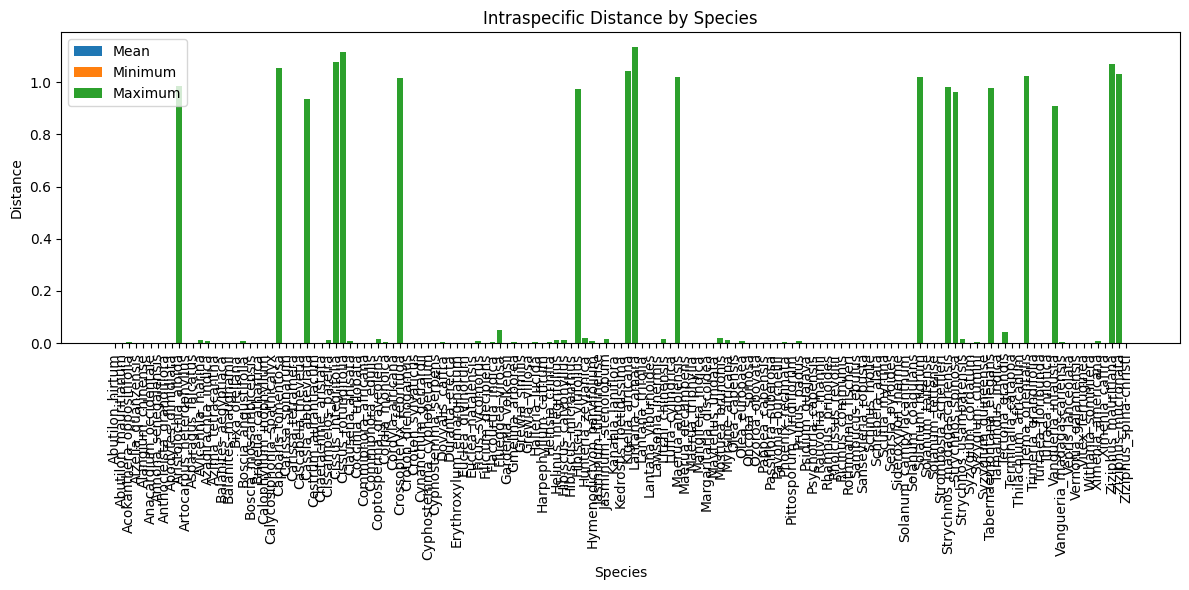

In [146]:
import matplotlib.pyplot as plt

# Plotting the intraspecific mean, minimum, and maximum distances
plt.figure(figsize=(12, 6))
plt.bar(result_data['Species'], result_data['Intraspecific Mean Distance'], label='Mean')
plt.bar(result_data['Species'], result_data['Intraspecific Minimum Distance'], label='Minimum')
plt.bar(result_data['Species'], result_data['Intraspecific Maximum Distance'], label='Maximum')

plt.xlabel('Species')
plt.ylabel('Distance')
plt.title('Intraspecific Distance by Species')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## Intraspecific distance of species with maximum K2P Genetic Distance >0.02 threshold

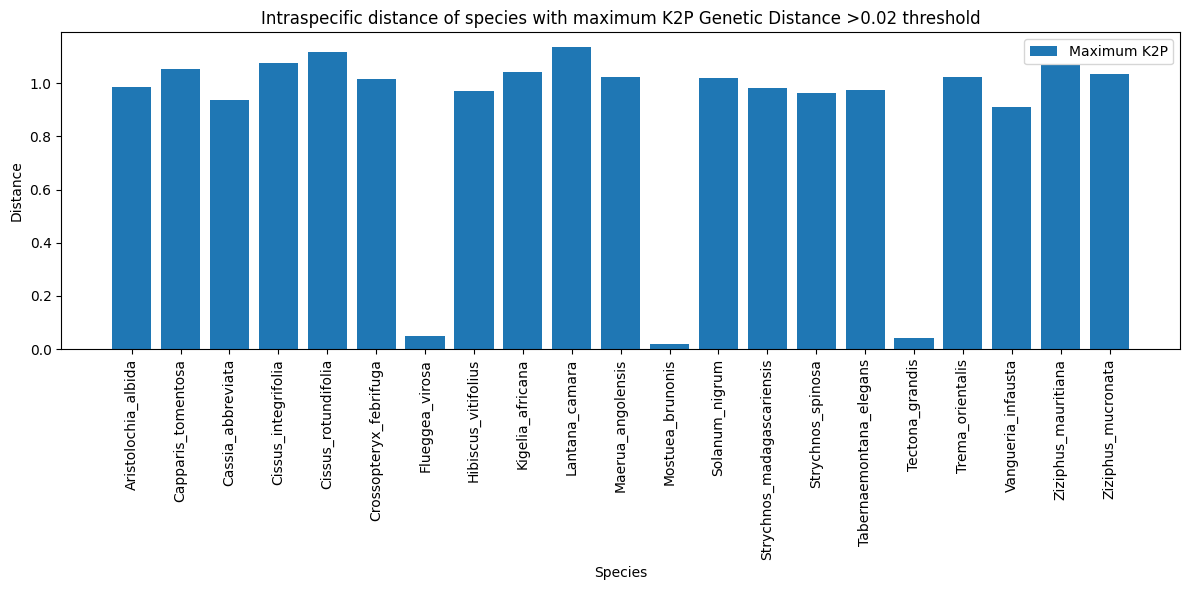

<Figure size 640x480 with 0 Axes>

In [147]:
import matplotlib.pyplot as plt

# # Filter the data based on the condition
# filtered_data = result_data[result_data['Intraspecific Maximum Distance'] > 0.02]

# # Plotting the intraspecific mean, minimum, and maximum distances
# plt.figure(figsize=(12, 6))
# plt.bar(filtered_data['Species'], filtered_data['Intraspecific Maximum Distance'], label='Maximum')

# plt.xlabel('Species')
# plt.ylabel('Distance')
# plt.title('Intraspecific Distance of Species with maximum K2P Genetic Distance > 0.02')
# plt.xticks(rotation=90)
# plt.legend()
# plt.tight_layout()

# Save the figure aimport matplotlib.pyplot as plt

# Filter the data based on the condition
filtered_data = result_data[result_data['Intraspecific Maximum Distance'] > 0.02]

# Plotting the intraspecific mean, minimum, and maximum distances
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Species'], filtered_data['Intraspecific Maximum Distance'], label='Maximum K2P')

plt.xlabel('Species')
plt.ylabel('Distance')
plt.title('Intraspecific distance of species with maximum K2P Genetic Distance >0.02 threshold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('genetic_relatedness_more_than_2_percente.png')
plt.show()
plt.savefig("plants_intraspecific_distance.png")

# Box plot to visualize potential outliers from the K2Pintraspecific distances greater than 2%

In [148]:
filtered_data = result_data[result_data['Intraspecific Maximum Distance'] > 0.02]
filtered_data

,Species,Intraspecific Mean Distance,Intraspecific Maximum Distance,Intraspecific Minimum Distance,N
9,Aristolochia_albida,0.003447,0.985804,0.985804,2
23,Capparis_tomentosa,0.006462,1.053343,0.000000,8
27,Cassia_abbreviata,0.006554,0.937195,0.000000,4
31,Cissus_integrifolia,0.003760,1.075340,1.075340,2
32,Cissus_rotundifolia,0.003902,1.115965,1.115965,2
40,Crossopteryx_febrifuga,0.005325,1.017098,0.000000,4
54,Flueggea_virosa,0.000237,0.050804,0.000000,3
65,Hibiscus_vitifolius,0.004454,0.971958,0.000000,3
72,Kigelia_africana,0.010626,1.040725,0.000000,8
73,Lantana_camara,0.007309,1.133903,0.000000,15


In [149]:
plants=list(filtered_data["Species"])
plants

['Aristolochia_albida',
 'Capparis_tomentosa',
 'Cassia_abbreviata',
 'Cissus_integrifolia',
 'Cissus_rotundifolia',
 'Crossopteryx_febrifuga',
 'Flueggea_virosa',
 'Hibiscus_vitifolius',
 'Kigelia_africana',
 'Lantana_camara',
 'Maerua_angolensis',
 'Mostuea_brunonis',
 'Solanum_nigrum',
 'Strychnos_madagascariensis',
 'Strychnos_spinosa',
 'Tabernaemontana_elegans',
 'Tectona_grandis',
 'Trema_orientalis',
 'Vangueria_infausta',
 'Ziziphus_mauritiana',
 'Ziziphus_mucronata']

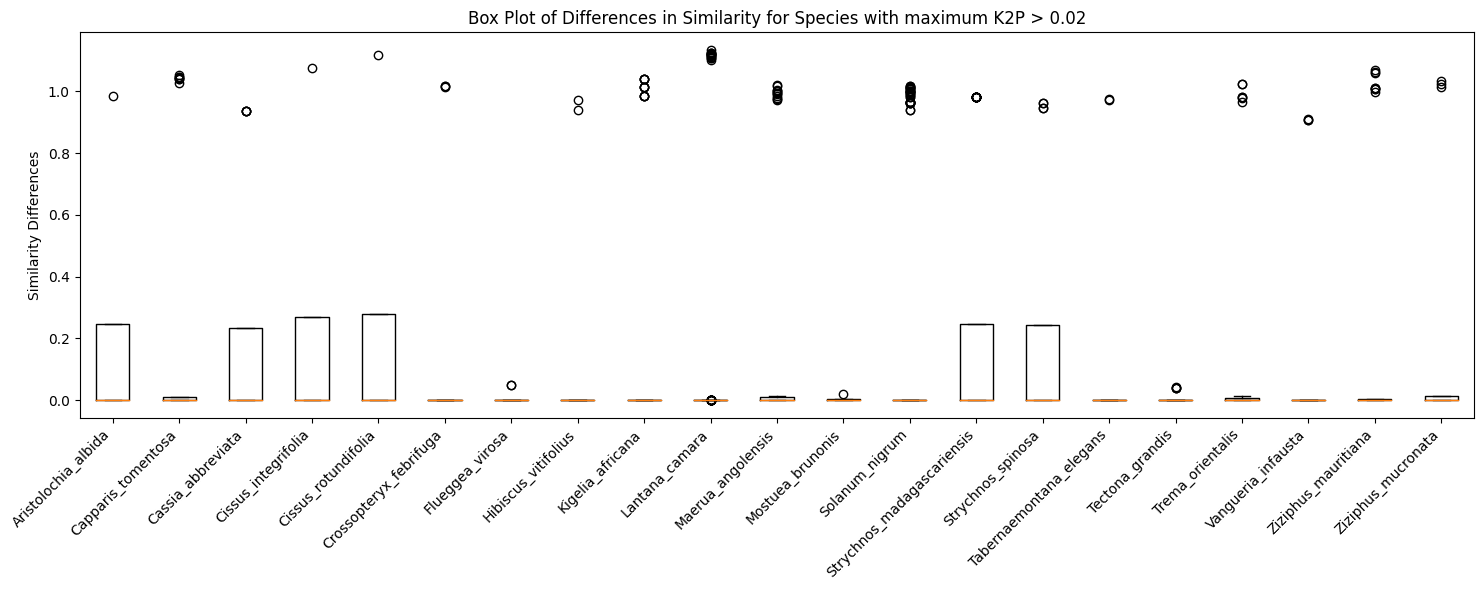

In [150]:
import numpy as np
import matplotlib.pyplot as plt

# Group the DataFrame by species column
grouped = results.get("species_data_frames")
species_data = []
grouped

# Loop through each grouped species and accumulate the similarity differences
for species, df_species in grouped.items():
    if species in plants:
        upper_tri = np.triu(df_species.values, k=1)
        upper_diagonal_values = upper_tri[upper_tri >= 0]
        species_data.append((species, upper_diagonal_values))

# Extract species names and corresponding data for plotting
species_names, all_data = zip(*species_data)

# Increase the size of the plot
plt.figure(figsize=(15, 6))  # Adjust the values as needed

# Create a single box plot for all species
box = plt.boxplot(all_data, labels=species_names)
plt.title("Box Plot of Differences in Similarity for Species with maximum K2P > 0.02")
plt.ylabel("Similarity Differences")

# Adjust x-axis label rotation for better alignment
plt.xticks(rotation=45, ha="right")  # Adding 'ha="right"' parameter

# Ensure enough space for the rotated labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()  
plt.savefig("similarity_differences_boxplot_plants.png")  # You can adjust the file name and DPI as needed
plt.show()


Inference: All the plant species with k2p greater than 2% exhibited questionable sequences

# Further inspection of species with k2p>0.02 with questionable sequences
Species that showed greater than 0.02 k2p genetci distance was extracted and the potential outliers blasted using NCBI-BLAST. The BOLD ID's were used to obtain the sequences from BOLD database, copy the matK sequnce and blast it in NCBI database

In [151]:
Aristolochia_albida=results.get("species_data_frames").get("Aristolochia_albida")
Aristolochia_albida

,Aristolochia_albida_50_OL537990_MADPL098-21,Aristolochia_albida_50_nan_PNG360-18
0,0.000000,0.985804
1,0.985804,0.000000


In [152]:
Aristolochia_albida_rows=df_matk_below500.groupby("species_name").get_group("Aristolochia albida")
Aristolochia_albida_rows

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
28,MADPL098-21,Aristolochia albida,Madagascar,OL537990,AATCATGTGTTAGATATCCTAATACCCCACCCCATCCATCTGGAAA...,50,Aristolochia,Aristolochiaceae,AATCATGTGTTAGATATCCTAATACCCCACCCCATCCATCTGGAAA...,842
29,PNG360-18,Aristolochia albida,Mozambique,NaN,CCAAAGTTCTAGCACATGAAAGTCGAAAGTATATACTTGATTCGAT...,50,Aristolochia,Aristolochiaceae,CCAAAGTTCTAGCACATGAAAGTCGAAAGTATATACTTGATTCGAT...,844


In [153]:
# find the outlier

In [154]:
Capparis_tomentosa=results.get("species_data_frames").get("Capparis_tomentosa")
Capparis_tomentosa  # KNPA1175-09 South Africa

,Capparis_tomentosa_114_JF270678_KNPA1175-09,Capparis_tomentosa_114_nan_PNG418-18,Capparis_tomentosa_114_JX518213_SAFH507-10,Capparis_tomentosa_114_KR734474_UHURU023-14,Capparis_tomentosa_114_KR734457_UHURU1045-14,Capparis_tomentosa_114_KR734481_UHURU1046-14,Capparis_tomentosa_114_KR734899_UHURU1047-14,Capparis_tomentosa_114_KR735106_UHURU1048-14
0,0.000000,1.038032,0.000000,0.010082,0.009494,0.009570,0.010381,0.009836
1,1.038032,0.000000,1.038032,1.043635,1.047270,1.053343,1.027571,1.045865
2,0.000000,1.038032,0.000000,0.010082,0.009494,0.009570,0.010381,0.009836
3,0.010082,1.043635,0.010082,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.009494,1.047270,0.009494,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.009570,1.053343,0.009570,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.010381,1.027571,0.010381,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.009836,1.045865,0.009836,0.000000,0.000000,0.000000,0.000000,0.000000


In [155]:
Capparis_tomentosa_rows=df_matk_below500.groupby("species_name").get_group("Capparis tomentosa")
Capparis_tomentosa_rows

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
87,KNPA1175-09,Capparis tomentosa,South Africa,JF270678,---------------------------TCTTCTTTGCATTTATTGC...,114,Capparis,Capparaceae,TCTTCTTTGCATTTATTGCGGTTCTGCCTATATGAGTATTGGAATT...,750
88,PNG418-18,Capparis tomentosa,Mozambique,NaN,CCAAAGTTTTAACACAAGAAAGTCGAAGTATATATTTTATTCGATA...,114,Capparis,Capparaceae,CCAAAGTTTTAACACAAGAAAGTCGAAGTATATATTTTATTCGATA...,822
89,SAFH507-10,Capparis tomentosa,South Africa,JX518213,---------------------------TCTTCTTTGCATTTATTGC...,114,Capparis,Capparaceae,TCTTCTTTGCATTTATTGCGGTTCTGCCTATATGAGTATTGGAATT...,750
90,UHURU023-14,Capparis tomentosa,Kenya,KR734474,GCCTCTTCTTTGCATTTATTGCGGTTCTGCCTATATGAGTATTGGA...,114,Capparis,Capparaceae,GCCTCTTCTTTGCATTTATTGCGGTTCTGCCTATATGAGTATTGGA...,702
91,UHURU1045-14,Capparis tomentosa,Kenya,KR734457,ATCAATTTTGAATACAAGATTTTTCTTGTTCTTATATAATTCTCAT...,114,Capparis,Capparaceae,ATCAATTTTGAATACAAGATTTTTCTTGTTCTTATATAATTCTCAT...,636
92,UHURU1046-14,Capparis tomentosa,Kenya,KR734481,TCAATTTTGAATACAAGATTTTTCTTGTTCTTATATAATTCTCATG...,114,Capparis,Capparaceae,TCAATTTTGAATACAAGATTTTTCTTGTTCTTATATAATTCTCATG...,631
93,UHURU1047-14,Capparis tomentosa,Kenya,KR734899,GGTTCTGCCTATATGAGTATTGGAATTGGAAGAATTTTTATACTCA...,114,Capparis,Capparaceae,GGTTCTGCCTATATGAGTATTGGAATTGGAAGAATTTTTATACTCA...,679
94,UHURU1048-14,Capparis tomentosa,Kenya,KR735106,TTCTTGTTCTTATATAATTCTCATGTATGTGAATACGAATCCATCT...,114,Capparis,Capparaceae,TTCTTGTTCTTATATAATTCTCATGTATGTGAATACGAATCCATCT...,614


In [156]:
Cassia_abbreviata=results.get("species_data_frames").get("Cassia_abbreviata")
Cassia_abbreviata

,Cassia_abbreviata_127_JF270682_KNPA1177-09,Cassia_abbreviata_127_nan_PNG321-18,Cassia_abbreviata_127_nan_PNG535-18,Cassia_abbreviata_127_JX517898_SAFH203-10
0,0.000000,0.937195,0.937195,0.000000
1,0.937195,0.000000,0.000000,0.937195
2,0.937195,0.000000,0.000000,0.937195
3,0.000000,0.937195,0.937195,0.000000


In [157]:
Capparis_tomentosa=results.get("species_data_frames").get("Capparis_tomentosa")
Capparis_tomentosa  # KNPA1175-09 South Africa

,Capparis_tomentosa_114_JF270678_KNPA1175-09,Capparis_tomentosa_114_nan_PNG418-18,Capparis_tomentosa_114_JX518213_SAFH507-10,Capparis_tomentosa_114_KR734474_UHURU023-14,Capparis_tomentosa_114_KR734457_UHURU1045-14,Capparis_tomentosa_114_KR734481_UHURU1046-14,Capparis_tomentosa_114_KR734899_UHURU1047-14,Capparis_tomentosa_114_KR735106_UHURU1048-14
0,0.000000,1.038032,0.000000,0.010082,0.009494,0.009570,0.010381,0.009836
1,1.038032,0.000000,1.038032,1.043635,1.047270,1.053343,1.027571,1.045865
2,0.000000,1.038032,0.000000,0.010082,0.009494,0.009570,0.010381,0.009836
3,0.010082,1.043635,0.010082,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.009494,1.047270,0.009494,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.009570,1.053343,0.009570,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.010381,1.027571,0.010381,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.009836,1.045865,0.009836,0.000000,0.000000,0.000000,0.000000,0.000000


In [158]:
Cissus_integrifolia=results.get("species_data_frames").get("Cissus_integrifolia")
Cissus_integrifolia

,Cissus_integrifolia_162_nan_PNG301-18,Cissus_integrifolia_162_JX517840_TSA179-10
0,0.00000,1.07534
1,1.07534,0.00000


In [159]:
Cissus_integrifolia=df_matk_below500.groupby("species_name").get_group("Cissus integrifolia")
Cissus_integrifolia

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
127,PNG301-18,Cissus integrifolia,Mozambique,NaN,CCAAAGTTCGAGCACAAGAAAGTCGAAGTATATATTTAATTCGATA...,162,Cissus,Vitaceae,CCAAAGTTCGAGCACAAGAAAGTCGAAGTATATATTTAATTCGATA...,837
128,TSA179-10,Cissus integrifolia,Mozambique,JX517840,---------------------------TCTTCTTTGCATTTATTAC...,162,Cissus,Vitaceae,TCTTCTTTGCATTTATTACGATTCTTTCTACACGAGTATCATAATT...,765


In [160]:
Cissus_rotundifolia=results.get("species_data_frames").get("Cissus_rotundifolia")
Cissus_rotundifolia

,Cissus_rotundifolia_166_nan_PNG311-18,Cissus_rotundifolia_166_KR734438_UHURU818-14
0,0.000000,1.115965
1,1.115965,0.000000


In [161]:
Cissus_rotundifolia=df_matk_below500.groupby("species_name").get_group("Cissus rotundifolia")
Cissus_rotundifolia

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
130,PNG311-18,Cissus rotundifolia,Mozambique,NaN,GAAGTATATATTTGATTCGATACAAATTCTTTTTTTTCGAGGACCC...,166,Cissus,Vitaceae,GAAGTATATATTTGATTCGATACAAATTCTTTTTTTTCGAGGACCC...,785
132,UHURU818-14,Cissus rotundifolia,Kenya,KR734438,TTATTACGATTCTTTGTACACGAGTATCATAATTGGAATAGTATGA...,166,Cissus,Vitaceae,TTATTACGATTCTTTGTACACGAGTATCATAATTGGAATAGTATGA...,708


In [162]:
Crossopteryx_febrifuga=results.get("species_data_frames").get("Crossopteryx_febrifuga")
Crossopteryx_febrifuga

,Crossopteryx_febrifuga_214_JF270725_KNPA1067-09,Crossopteryx_febrifuga_214_nan_KNPA346-09,Crossopteryx_febrifuga_214_nan_PNG524-18,Crossopteryx_febrifuga_214_JX517365_TSA129-10
0,0.000000,0.000000,1.012855,0.000000
1,0.000000,0.000000,1.017098,0.000000
2,1.012855,1.017098,0.000000,1.015735
3,0.000000,0.000000,1.015735,0.000000


In [163]:
Crossopteryx_febrifuga=df_matk_below500.groupby("species_name").get_group("Crossopteryx febrifuga")
Crossopteryx_febrifuga

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
165,KNPA1067-09,Crossopteryx febrifuga,South Africa,JF270725,---------------------------------------------C...,214,Crossopteryx,Rubiaceae,CGATTCTTTTTCCACGAATATTGGAATTGGAATACTCTTATTGATA...,744
166,KNPA346-09,Crossopteryx febrifuga,South Africa,NaN,----------------------------------------------...,214,Crossopteryx,Rubiaceae,GAATACTCTTATTGATAGAAAGAAACCCAGTTTTGATTTTTCACCA...,701
167,PNG524-18,Crossopteryx febrifuga,Mozambique,NaN,CCAAAGTTTTAGCACAAGAAAGTCGAAAGTATATACTTTATTCGAT...,214,Crossopteryx,Rubiaceae,CCAAAGTTTTAGCACAAGAAAGTCGAAAGTATATACTTTATTCGAT...,781
168,TSA129-10,Crossopteryx febrifuga,Mozambique,JX517365,---------------------------TCTTCCTTGCATTTATTAC...,214,Crossopteryx,Rubiaceae,TCTTCCTTGCATTTATTACGATTCTTTTTCCACGAATATTGGAATT...,768


In [164]:
Crossopteryx_febrifuga=results.get("species_data_frames").get("Crossopteryx_febrifuga")
Crossopteryx_febrifuga

,Crossopteryx_febrifuga_214_JF270725_KNPA1067-09,Crossopteryx_febrifuga_214_nan_KNPA346-09,Crossopteryx_febrifuga_214_nan_PNG524-18,Crossopteryx_febrifuga_214_JX517365_TSA129-10
0,0.000000,0.000000,1.012855,0.000000
1,0.000000,0.000000,1.017098,0.000000
2,1.012855,1.017098,0.000000,1.015735
3,0.000000,0.000000,1.015735,0.000000


In [165]:
Flueggea_virosa=results.get("species_data_frames").get("Flueggea_virosa")
Flueggea_virosa

,Flueggea_virosa_349_JX517340_KNPA545-09,Flueggea_virosa_349_JF270790_KNPA829-09,Flueggea_virosa_349_nan_PHSN004-14
0,0.000000,0.000000,0.050804
1,0.000000,0.000000,0.050804
2,0.050804,0.050804,0.000000


In [166]:
Flueggea_virosa=df_matk_below500.groupby("species_name").get_group("Flueggea virosa")
Flueggea_virosa

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
245,KNPA545-09,Flueggea virosa,South Africa,JX517340,---------------------------TCTTCTTTGCATTTATTAC...,349,Flueggea,Phyllanthaceae,TCTTCTTTGCATTTATTACGATTTTTTCTTCACGAGTATTGGAATT...,765
246,KNPA829-09,Flueggea virosa,South Africa,JF270790,---------------------------TCTTCTTTGCATTTATTAC...,349,Flueggea,Phyllanthaceae,TCTTCTTTGCATTTATTACGATTTTTTCTTCACGAGTATTGGAATT...,765
247,PHSN004-14,Flueggea virosa,Nigeria,NaN,TAATTCTCAAGTAGAGGGAATATGAATCCTTCTTTTTTTTTCTCCG...,349,Flueggea,Phyllanthaceae,TAATTCTCAAGTAGAGGGAATATGAATCCTTCTTTTTTTTTCTCCG...,520


In [167]:
Hibiscus_vitifolius=results.get("species_data_frames").get("Hibiscus_vitifolius")
Hibiscus_vitifolius

,Hibiscus_vitifolius_408_nan_PNG350-18,Hibiscus_vitifolius_408_KR734636_UHURU688-14,Hibiscus_vitifolius_408_KR734626_UHURU689-14
0,0.000000,0.938802,0.971958
1,0.938802,0.000000,0.000000
2,0.971958,0.000000,0.000000


In [168]:
Hibiscus_vitifolius=df_matk_below500.groupby("species_name").get_group("Hibiscus vitifolius")
Hibiscus_vitifolius

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
299,PNG350-18,Hibiscus vitifolius,Mozambique,NaN,CCAAAGTTTTAACACAAGAAAACCGAAGTATATATTTTATTCGATA...,408,Hibiscus,Malvaceae,CCAAAGTTTTAACACAAGAAAACCGAAGTATATATTTTATTCGATA...,822
300,UHURU688-14,Hibiscus vitifolius,Kenya,KR734636,GATTATTCTTGTTCCTATATAATTCTCATGCATATGAATACGAATC...,408,Hibiscus,Malvaceae,GATTATTCTTGTTCCTATATAATTCTCATGCATATGAATACGAATC...,619
301,UHURU689-14,Hibiscus vitifolius,Kenya,KR734626,TAGAGTATCTTGTAGAAGTCTTTTATAATGATTTTCAGAACAACCT...,408,Hibiscus,Malvaceae,TAGAGTATCTTGTAGAAGTCTTTTATAATGATTTTCAGAACAACCT...,480


In [169]:
Kigelia_africana=results.get("species_data_frames").get("Kigelia_africana")
Kigelia_africana

,Kigelia_africana_446_JF270837_KNPA1166-09,Kigelia_africana_446_nan_PNG400-18,Kigelia_africana_446_nan_TDEF209-12,Kigelia_africana_446_nan_TDEF210-12,Kigelia_africana_446_JF270837_KNPA1166-09.1,Kigelia_africana_446_nan_PNG400-18.1,Kigelia_africana_446_nan_TDEF209-12.1,Kigelia_africana_446_nan_TDEF210-12.1
0,0.000000,0.983194,0.000000,0.000000,0.000000,0.983194,0.000000,0.000000
1,0.983194,0.000000,1.040725,1.015089,0.983194,0.000000,1.040725,1.015089
2,0.000000,1.040725,0.000000,0.000000,0.000000,1.040725,0.000000,0.000000
3,0.000000,1.015089,0.000000,0.000000,0.000000,1.015089,0.000000,0.000000
4,0.000000,0.983194,0.000000,0.000000,0.000000,0.983194,0.000000,0.000000
5,0.983194,0.000000,1.040725,1.015089,0.983194,0.000000,1.040725,1.015089
6,0.000000,1.040725,0.000000,0.000000,0.000000,1.040725,0.000000,0.000000
7,0.000000,1.015089,0.000000,0.000000,0.000000,1.015089,0.000000,0.000000


In [170]:
Kigelia_africana=df_matk_below500.groupby("species_name").get_group("Kigelia africana")
Kigelia_africana

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
325,KNPA1166-09,Kigelia africana,South Africa,JF270837,---------------------------TCTTCTTTGCATTTATTAC...,446,Kigelia,Bignoniaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAACGAGTATTGTAATT...,771
326,PNG400-18,Kigelia africana,Mozambique,NaN,CTAAAGTTCTAGCACAAGAAAGTCGAAGTATATACTTTATTCGATA...,446,Kigelia,Bignoniaceae,CTAAAGTTCTAGCACAAGAAAGTCGAAGTATATACTTTATTCGATA...,843
327,TDEF209-12,Kigelia africana,India,NaN,AAATTCTTCGCTATTGGGTAAAAGATGCCTCTTCTTTGCATTTATT...,446,Kigelia,Bignoniaceae,AAATTCTTCGCTATTGGGTAAAAGATGCCTCTTCTTTGCATTTATT...,843
328,TDEF210-12,Kigelia africana,India,NaN,------------------------------------GCCTCTTCTT...,446,Kigelia,Bignoniaceae,GCCTCTTCTTTGCATTTATTACGATTCTTTCTCAACGAGTATTGTA...,820
329,KNPA1166-09,Kigelia africana,South Africa,JF270837,---------------------------TCTTCTTTGCATTTATTAC...,446,Kigelia,Bignoniaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAACGAGTATTGTAATT...,771
330,PNG400-18,Kigelia africana,Mozambique,NaN,CTAAAGTTCTAGCACAAGAAAGTCGAAGTATATACTTTATTCGATA...,446,Kigelia,Bignoniaceae,CTAAAGTTCTAGCACAAGAAAGTCGAAGTATATACTTTATTCGATA...,843
331,TDEF209-12,Kigelia africana,India,NaN,AAATTCTTCGCTATTGGGTAAAAGATGCCTCTTCTTTGCATTTATT...,446,Kigelia,Bignoniaceae,AAATTCTTCGCTATTGGGTAAAAGATGCCTCTTCTTTGCATTTATT...,843
332,TDEF210-12,Kigelia africana,India,NaN,------------------------------------GCCTCTTCTT...,446,Kigelia,Bignoniaceae,GCCTCTTCTTTGCATTTATTACGATTCTTTCTCAACGAGTATTGTA...,820


In [171]:
Lantana_camara=results.get("species_data_frames").get("Lantana_camara")
Lantana_camara

,Lantana_camara_462_MG784975_CRCZ235-16,Lantana_camara_462_JX495729_HOSAM105-11,Lantana_camara_462_JF270846_KNPA1296-09,Lantana_camara_462_JQ589434_MHPAD032-08,Lantana_camara_462_JQ589435_MHPAD033-08,Lantana_camara_462_JQ589436_MHPAD034-08,Lantana_camara_462_JQ589437_MHPAD1050-09,Lantana_camara_462_JQ589438_MHPAD1051-09,Lantana_camara_462_JQ589439_MHPAD1052-09,Lantana_camara_462_JQ589440_MHPAD986-09,Lantana_camara_462_JQ589441_MHPAD987-09,Lantana_camara_462_JQ589442_MHPAD988-09,Lantana_camara_462_nan_PNG377-18,Lantana_camara_462_nan_SDH2086-14,Lantana_camara_462_MK290473_UHURU1453-15
0,0.000000,0.001369,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.120571,0.000000,0.001447
1,0.001369,0.000000,0.001298,0.001287,0.001287,0.001287,0.001308,0.001345,0.001314,0.001336,0.001379,0.001338,1.118025,0.001349,0.000000
2,0.000000,0.001298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.117127,0.000000,0.001371
3,0.000000,0.001287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.123798,0.000000,0.001371
4,0.000000,0.001287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.123798,0.000000,0.001371
5,0.000000,0.001287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.123798,0.000000,0.001371
6,0.000000,0.001308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.120816,0.000000,0.001371
7,0.000000,0.001345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.108850,0.000000,0.001371
8,0.000000,0.001314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.118512,0.000000,0.001373
9,0.000000,0.001336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.111300,0.000000,0.001371


In [172]:
Lantana_camara=df_matk_below500.groupby("species_name").get_group("Lantana camara")
Lantana_camara

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
334,CRCZ235-16,Lantana camara,Indonesia,MG784975,CAATAGTCTTATTACTCCAACGAAAGCGAGTTCCTCTTTTTTAAAA...,462,Lantana,Verbenaceae,CAATAGTCTTATTACTCCAACGAAAGCGAGTTCCTCTTTTTTAAAA...,731
335,HOSAM105-11,Lantana camara,Egypt,JX495729,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAAT-...,462,Lantana,Verbenaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATT...,783
336,KNPA1296-09,Lantana camara,South Africa,JF270846,---------------------------TCTTCTTTGCATTTATTAC...,462,Lantana,Verbenaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATT...,771
337,MHPAD032-08,Lantana camara,Costa Rica,JQ589434,TCTTCTTTGCATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATT...,778
338,MHPAD033-08,Lantana camara,Costa Rica,JQ589435,TCTTCTTTGCATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATT...,778
339,MHPAD034-08,Lantana camara,Costa Rica,JQ589436,TCTTCTTTGCATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATT...,778
340,MHPAD1050-09,Lantana camara,Costa Rica,JQ589437,--------GCATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,GCATTTATTACGATTCTTTCTCAATGAGTATTGTAATTGCAATAGT...,765
341,MHPAD1051-09,Lantana camara,Costa Rica,JQ589438,TCTTCTTTGCATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,TCTTCTTTGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATT...,744
342,MHPAD1052-09,Lantana camara,Costa Rica,JQ589439,----------ATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,ATTTATTACGATTCTTTCTCAATGAGTATTGTAATTGCAATAGTCT...,762
343,MHPAD986-09,Lantana camara,Costa Rica,JQ589440,-------TGCATTTATTACGA---TTCTTTCTCAATGAGTATTGT-...,462,Lantana,Verbenaceae,TGCATTTATTACGATTCTTTCTCAATGAGTATTGTAATTGCAATAG...,749


In [173]:
Maerua_angolensis=results.get("species_data_frames").get("Maerua_angolensis")
Maerua_angolensis

,Maerua_angolensis_480_JF270853_KNPA842-09,Maerua_angolensis_480_nan_PNG287-18,Maerua_angolensis_480_nan_PNG476-18,Maerua_angolensis_480_JX518208_SAFH597-10,Maerua_angolensis_480_KR734684_UHURU748-14,Maerua_angolensis_480_KR734465_UHURU749-14,Maerua_angolensis_480_KR734410_UHURU750-14,Maerua_angolensis_480_KR734660_UHURU751-14
0,0.000000,1.021107,0.999746,0.000000,0.010249,0.010479,0.010309,0.010189
1,1.021107,0.000000,0.013524,1.002806,0.999746,0.991196,0.993796,1.016016
2,0.999746,0.013524,0.000000,0.983889,0.979103,0.970947,0.973558,0.994951
3,0.000000,1.002806,0.983889,0.000000,0.010115,0.010086,0.010043,0.010072
4,0.010249,0.999746,0.979103,0.010115,0.000000,0.000000,0.000000,0.000000
5,0.010479,0.991196,0.970947,0.010086,0.000000,0.000000,0.000000,0.000000
6,0.010309,0.993796,0.973558,0.010043,0.000000,0.000000,0.000000,0.000000
7,0.010189,1.016016,0.994951,0.010072,0.000000,0.000000,0.000000,0.000000


In [174]:
Maerua_angolensis=df_matk_below500.groupby("species_name").get_group("Maerua angolensis")
Maerua_angolensis

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
368,KNPA842-09,Maerua angolensis,South Africa,JF270853,----------------------------------------------...,480,Maerua,Capparaceae,GAGTATTGGAATTGGAAGAATTTTTATACTCAAAAAAAATCAATTT...,697
369,PNG287-18,Maerua angolensis,Mozambique,NaN,CCAAAGTTTTAACACAAGAAAGGCGAAGTATATATTTTATTCGATA...,480,Maerua,Capparaceae,CCAAAGTTTTAACACAAGAAAGGCGAAGTATATATTTTATTCGATA...,822
370,PNG476-18,Maerua angolensis,Mozambique,NaN,CCAAAGTTTTAACACAAGAAAGGCGAAGTATATATTTTATTCGATA...,480,Maerua,Capparaceae,CCAAAGTTTTAACACAAGAAAGGCGAAGTATATATTTTATTCGATA...,822
371,SAFH597-10,Maerua angolensis,South Africa,JX518208,---------------------------TCTTCTTTGCATTTATTGC...,480,Maerua,Capparaceae,TCTTCTTTGCATTTATTGCGGTTCTGTCTATATGAGTATTGGAATT...,750
372,UHURU748-14,Maerua angolensis,Kenya,KR734684,TGTCTATATGAGTATTGGAATTGGAAGAATTTTTATACTCAAAAAA...,480,Maerua,Capparaceae,TGTCTATATGAGTATTGGAATTGGAAGAATTTTTATACTCAAAAAA...,697
373,UHURU749-14,Maerua angolensis,Kenya,KR734465,TGCATTTATTGCGGTTCTGTCTATATGAGTATTGGAATTGGAAGAA...,480,Maerua,Capparaceae,TGCATTTATTGCGGTTCTGTCTATATGAGTATTGGAATTGGAAGAA...,699
374,UHURU750-14,Maerua angolensis,Kenya,KR734410,TTGCGGTTCTGTCTATATGAGTATTGGAATTGGAAGAATTTTTATA...,480,Maerua,Capparaceae,TTGCGGTTCTGTCTATATGAGTATTGGAATTGGAAGAATTTTTATA...,702
375,UHURU751-14,Maerua angolensis,Kenya,KR734660,GTCTATATGAGTATTGGAATTGGAAGAATTTTTATACTCAAAAAAA...,480,Maerua,Capparaceae,GTCTATATGAGTATTGGAATTGGAAGAATTTTTATACTCAAAAAAA...,700


In [175]:
Mostuea_brunonis=results.get("species_data_frames").get("Mostuea_brunonis")
Mostuea_brunonis

,Mostuea_brunonis_533_OL538001_MADPL095-21,Mostuea_brunonis_533_KC627457_TCAFR662-10
0,0.000000,0.021153
1,0.021153,0.000000


In [176]:
Mostuea_brunonis=df_matk_below500.groupby("species_name").get_group("Mostuea brunonis")
Mostuea_brunonis

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
396,MADPL095-21,Mostuea brunonis,Madagascar,OL538001,AATTCTGTGTTAGATATACTAATACCCTACCCTGCCCATCTGGAAA...,533,Mostuea,Gelsemiaceae,AATTCTGTGTTAGATATACTAATACCCTACCCTGCCCATCTGGAAA...,847
397,TCAFR662-10,Mostuea brunonis,Cameroon,KC627457,----------------------------------------------...,533,Mostuea,Gelsemiaceae,ACACGAGTATTGGAATTGGAATAATCTTATTTCTACAAAGAAACCC...,480


In [177]:
Solanum_nigrum=results.get("species_data_frames").get("Solanum_nigrum")
Solanum_nigrum

,Solanum_nigrum_756_nan_FBPL2337-13,Solanum_nigrum_756_nan_FBPL2481-13,Solanum_nigrum_756_nan_FBPL2713-13,Solanum_nigrum_756_nan_PNG261-18,Solanum_nigrum_756_JN894603_POWNA1603-12,Solanum_nigrum_756_JN894604_POWNA1604-12,Solanum_nigrum_756_JN895462_POWNA693-10,Solanum_nigrum_756_JQ412290_SAFH1986-11,Solanum_nigrum_756_nan_SDH2058-14,Solanum_nigrum_756_KR734952_UHURU263-14,Solanum_nigrum_756_KR734731_UHURU264-14,Solanum_nigrum_756_KR734922_UHURU265-14,Solanum_nigrum_756_KR734764_UHURU266-14,Solanum_nigrum_756_KR734694_UHURU728-14,Solanum_nigrum_756_KR734375_UHURU731-14,Solanum_nigrum_756_nan_PNG149-18,Solanum_nigrum_756_KR735097_UHURU729-14
0,0.000000,0.000000,0.000000,1.014707,0.000000,0.000000,0.000000,0.000000,0.000000,0.001402,0.001368,0.001368,0.001979,0.001501,0.001620,1.018022,0.001447
1,0.000000,0.000000,0.000000,1.014707,0.000000,0.000000,0.000000,0.000000,0.000000,0.001402,0.001368,0.001368,0.001979,0.001501,0.001620,1.018022,0.001447
2,0.000000,0.000000,0.000000,1.007939,0.000000,0.000000,0.000000,0.000000,0.000000,0.001402,0.001371,0.001371,0.001979,0.001505,0.001620,1.011214,0.001447
3,1.014707,1.014707,1.007939,0.000000,0.993366,0.996766,0.964452,0.980961,1.007687,0.987040,1.001776,0.998439,0.966536,0.961326,0.940813,0.000000,0.962470
4,0.000000,0.000000,0.000000,0.993366,0.000000,0.000000,0.000000,0.000000,0.000000,0.001428,0.001388,0.001386,0.001979,0.001494,0.001620,0.990173,0.001447
5,0.000000,0.000000,0.000000,0.996766,0.000000,0.000000,0.000000,0.000000,0.000000,0.001402,0.001364,0.001362,0.001979,0.001494,0.001620,0.999785,0.001447
6,0.000000,0.000000,0.000000,0.964452,0.000000,0.000000,0.000000,0.000000,0.000000,0.001430,0.001430,0.001430,0.001979,0.001564,0.001647,0.964452,0.001468
7,0.000000,0.000000,0.000000,0.980961,0.000000,0.000000,0.000000,0.000000,0.000000,0.001408,0.001369,0.001368,0.001979,0.001494,0.001620,0.980961,0.001447
8,0.000000,0.000000,0.000000,1.007687,0.000000,0.000000,0.000000,0.000000,0.000000,0.001402,0.001388,0.001388,0.001979,0.001526,0.001620,1.011006,0.001447
9,0.001402,0.001402,0.001402,0.987040,0.001428,0.001402,0.001430,0.001408,0.001402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.987040,0.000000


In [178]:
Solanum_nigrum=df_matk_below500.groupby("species_name").get_group("Solanum nigrum")
Solanum_nigrum

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
529,FBPL2337-13,Solanum nigrum,Finland,NaN,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,756,Solanum,Solanaceae,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,777
530,FBPL2481-13,Solanum nigrum,Finland,NaN,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,756,Solanum,Solanaceae,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,777
531,FBPL2713-13,Solanum nigrum,Finland,NaN,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,756,Solanum,Solanaceae,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,775
532,PNG261-18,Solanum nigrum,Mozambique,NaN,CTAAAGTTCTAGCACAAGAAAGTCGAAAGTATATACTTTATTCGAT...,756,Solanum,Solanaceae,CTAAAGTTCTAGCACAAGAAAGTCGAAAGTATATACTTTATTCGAT...,830
533,POWNA1604-12,Solanum nigrum,United Kingdom,JN894604,ATCTAAATTATGTATTAGATATACTAATACCCTACCCCGTTCATCT...,756,Solanum,Solanaceae,ATCTAAATTATGTATTAGATATACTAATACCCTACCCCGTTCATCT...,858
534,SAFH1986-11,Solanum nigrum,South Africa,JQ412290,---------------------------TCTTCTTTACATTTATTAC...,756,Solanum,Solanaceae,TCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTAGTC...,756
535,SDH2058-14,Solanum nigrum,United States,NaN,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,756,Solanum,Solanaceae,CATCTGGAAATCTTGGTTCAAACTCTTCGCTATTGGGTAAAAGATG...,766
536,UHURU263-14,Solanum nigrum,Kenya,KR734952,GCCTCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTA...,756,Solanum,Solanaceae,GCCTCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTA...,714
537,UHURU264-14,Solanum nigrum,Kenya,KR734731,GCCTCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTA...,756,Solanum,Solanaceae,GCCTCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTA...,734
538,UHURU265-14,Solanum nigrum,Kenya,KR734922,GCCTCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTA...,756,Solanum,Solanaceae,GCCTCTTCTTTACATTTATTACGATTCTTTCTCCACGAATATTGTA...,735


In [179]:
Strychnos_madagascariensis=results.get("species_data_frames").get("Strychnos_madagascariensis")
Strychnos_madagascariensis

,Strychnos_madagascariensis_774_JF270952_KNPA1496-09,Strychnos_madagascariensis_774_nan_PNG389-18,Strychnos_madagascariensis_774_nan_PNG390-18,Strychnos_madagascariensis_774_JX517867_TSA268-10,Strychnos_madagascariensis_774_JF270952_KNPA1496-09.1,Strychnos_madagascariensis_774_nan_PNG389-18.1,Strychnos_madagascariensis_774_nan_PNG390-18.1,Strychnos_madagascariensis_774_JX517867_TSA268-10.1
0,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000
1,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219
2,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219
3,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000
4,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000
5,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219
6,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219
7,0.00000,0.98219,0.98219,0.00000,0.00000,0.98219,0.98219,0.00000


In [180]:
Strychnos_madagascariensis=df_matk_below500.groupby("species_name").get_group("Strychnos madagascariensis")
Strychnos_madagascariensis

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
560,KNPA1496-09,Strychnos madagascariensis,South Africa,JF270952,---------------------------TCCTCTTTGCATTTATTAC...,774,Strychnos,Loganiaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCTACGAGTATTGTAATT...,768
561,PNG389-18,Strychnos madagascariensis,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,774,Strychnos,Loganiaceae,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,812
562,PNG390-18,Strychnos madagascariensis,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,774,Strychnos,Loganiaceae,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,823
563,TSA268-10,Strychnos madagascariensis,Mozambique,JX517867,---------------------------TCCTCTTTGCATTTATTAC...,774,Strychnos,Loganiaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCTACGAGTATTGTAATT...,768
564,KNPA1496-09,Strychnos madagascariensis,South Africa,JF270952,---------------------------TCCTCTTTGCATTTATTAC...,774,Strychnos,Loganiaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCTACGAGTATTGTAATT...,768
565,PNG389-18,Strychnos madagascariensis,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,774,Strychnos,Loganiaceae,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,812
566,PNG390-18,Strychnos madagascariensis,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,774,Strychnos,Loganiaceae,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,823
567,TSA268-10,Strychnos madagascariensis,Mozambique,JX517867,---------------------------TCCTCTTTGCATTTATTAC...,774,Strychnos,Loganiaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCTACGAGTATTGTAATT...,768


In [181]:
Strychnos_spinosa=results.get("species_data_frames").get("Strychnos_spinosa")
Strychnos_spinosa

,Strychnos_spinosa_779_JF270955_KNPA1169-09,Strychnos_spinosa_779_nan_PNG278-18,Strychnos_spinosa_779_nan_PNG319-18,Strychnos_spinosa_779_JX517766_TSA263-10
0,0.000000,0.963320,0.945136,0.000000
1,0.963320,0.000000,0.008388,0.963320
2,0.945136,0.008388,0.000000,0.945136
3,0.000000,0.963320,0.945136,0.000000


In [182]:
Strychnos_spinosa=df_matk_below500.groupby("species_name").get_group("Strychnos spinosa")
Strychnos_spinosa

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
570,KNPA1169-09,Strychnos spinosa,South Africa,JF270955,---------------------------TCCTCTTTGCATTTATTAC...,779,Strychnos,Loganiaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCTACGAGTATTGTAATT...,768
571,PNG278-18,Strychnos spinosa,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,779,Strychnos,Loganiaceae,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,840
572,PNG319-18,Strychnos spinosa,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,779,Strychnos,Loganiaceae,CTAAAGTTTTAGCACAAGAAAGCCGAAGTATATACTTTATTCGATA...,840
573,TSA263-10,Strychnos spinosa,Mozambique,JX517766,---------------------------TCCTCTTTGCATTTATTAC...,779,Strychnos,Loganiaceae,TCCTCTTTGCATTTATTACGATTCTTTCTCTACGAGTATTGTAATT...,768


In [183]:
Tabernaemontana_elegans=results.get("species_data_frames").get("Tabernaemontana_elegans")
Tabernaemontana_elegans

,Tabernaemontana_elegans_792_JF270961_KNPA1369-09,Tabernaemontana_elegans_792_nan_PNG396-18,Tabernaemontana_elegans_792_JX517818_SAFH300-10
0,0.000000,0.975759,0.000000
1,0.975759,0.000000,0.970389
2,0.000000,0.970389,0.000000


In [184]:
Tabernaemontana_elegans=df_matk_below500.groupby("species_name").get_group("Tabernaemontana elegans")
Tabernaemontana_elegans

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
590,KNPA1369-09,Tabernaemontana elegans,South Africa,JF270961,---------------------------CCTTCTTTGCACTTATTAC...,792,Tabernaemontana,Apocynaceae,CCTTCTTTGCACTTATTACGATTCTTTCTCCGCGAGTATTGGAATT...,789
591,PNG396-18,Tabernaemontana elegans,Mozambique,NaN,CTAAAGTTTTAGCACAAGAAAGTCGAAGTATATACTTTATTCGATA...,792,Tabernaemontana,Apocynaceae,CTAAAGTTTTAGCACAAGAAAGTCGAAGTATATACTTTATTCGATA...,855
592,SAFH300-10,Tabernaemontana elegans,Zimbabwe,JX517818,-----------------------------TTCTTTGCACTTATTAC...,792,Tabernaemontana,Apocynaceae,TTCTTTGCACTTATTACGATTCTTTCTCCGCGAGTATTGGAATTGT...,787


In [185]:
Tabernaemontana_elegans=results.get("species_data_frames").get("Tectona_grandis")
Tabernaemontana_elegans

,Tectona_grandis_804_nan_GENG004-11,Tectona_grandis_804_JQ589486_MHPAC1137-11,Tectona_grandis_804_nan_TDEF346-12,Tectona_grandis_804_nan_TDEF347-12,Tectona_grandis_804_nan_TDEF348-12
0,0.000000,0.041616,0.04133,0.040547,0.040547
1,0.041616,0.000000,0.00000,0.000000,0.000000
2,0.041330,0.000000,0.00000,0.000000,0.000000
3,0.040547,0.000000,0.00000,0.000000,0.000000
4,0.040547,0.000000,0.00000,0.000000,0.000000


In [186]:
Tabernaemontana_elegans=df_matk_below500.groupby("species_name").get_group("Tectona grandis")
Tabernaemontana_elegans

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
608,GENG004-11,Tectona grandis,India,NaN,----------------------------------------------...,804,Tectona,Lamiaceae,CTTGTCCGGTTGGTTTTGAGCTTTGTCCATTTCCGTTCGACTTTCT...,775
609,MHPAC1137-11,Tectona grandis,Costa Rica,JQ589486,TCTTCTTTGCATTTATTACGA---GTCTTTCTCAACGAATATTGT-...,804,Tectona,Lamiaceae,TCTTCTTTGCATTTATTACGAGTCTTTCTCAACGAATATTGTAATT...,787
610,TDEF346-12,Tectona grandis,India,NaN,------------------------------------GCTTCTTCTT...,804,Tectona,Lamiaceae,GCTTCTTCTTTGCATTTATTACGAGTCTTTCTCAACGAATATTGTA...,795
611,TDEF347-12,Tectona grandis,India,NaN,AAACTCTTCGCTATTGGGTAAAAGATGCTTCTTCTTTGCATTTATT...,804,Tectona,Lamiaceae,AAACTCTTCGCTATTGGGTAAAAGATGCTTCTTCTTTGCATTTATT...,852
612,TDEF348-12,Tectona grandis,India,NaN,AAACTCTTCGCTATTGGGTAAAAGATGCTTCTTCTTTGCATTTATT...,804,Tectona,Lamiaceae,AAACTCTTCGCTATTGGGTAAAAGATGCTTCTTCTTTGCATTTATT...,852


In [187]:
Trema_orientalis=results.get("species_data_frames").get("Trema_orientalis")
Trema_orientalis

,Trema_orientalis_818_nan_BAMP004-17,Trema_orientalis_818_MG648342_CRCZ1169-16,Trema_orientalis_818_MG648341_CRCZ1170-16,Trema_orientalis_818_nan_KNPA029-08,Trema_orientalis_818_JF270972_KNPA1392-09,Trema_orientalis_818_nan_PNG371-18,Trema_orientalis_818_JX518199_SAFH693-10
0,0.000000,0.000000,0.000000,0.012245,0.005500,0.981114,0.006619
1,0.000000,0.000000,0.000000,0.014564,0.006642,1.024509,0.006642
2,0.000000,0.000000,0.000000,0.014564,0.006642,1.024509,0.006642
3,0.012245,0.014564,0.014564,0.000000,0.006101,0.982004,0.006101
4,0.005500,0.006642,0.006642,0.006101,0.000000,0.977162,0.000000
5,0.981114,1.024509,1.024509,0.982004,0.977162,0.000000,0.964605
6,0.006619,0.006642,0.006642,0.006101,0.000000,0.964605,0.000000


In [188]:
Trema_orientalis=df_matk_below500.groupby("species_name").get_group("Trema orientalis")
Trema_orientalis

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
622,BAMP004-17,Trema orientalis,India,NaN,ATGTATCAGATGTACTAATACCCTATCCCATTCATCTGGAAATCTT...,818,Trema,Ulmaceae,ATGTATCAGATGTACTAATACCCTATCCCATTCATCTGGAAATCTT...,839
623,CRCZ1169-16,Trema orientalis,Indonesia,MG648342,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,818,Trema,Ulmaceae,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,605
624,CRCZ1170-16,Trema orientalis,Indonesia,MG648341,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,818,Trema,Ulmaceae,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,605
625,KNPA029-08,Trema orientalis,South Africa,NaN,---------------------------TCTTCCTTGCATTTATTAC...,818,Trema,Ulmaceae,TCTTCCTTGCATTTATTACGGCTTTTTCTTCATGAGTATTATAATT...,494
626,KNPA1392-09,Trema orientalis,South Africa,JF270972,---------------------------TCTTCCTTGCATTTATTAC...,818,Trema,Ulmaceae,TCTTCCTTGCATTTATTACGGCTTTTTCTTCATGAGTATTATAATT...,730
627,PNG371-18,Trema orientalis,Mozambique,NaN,ATATTTTACTCGATACAAACTTTTTTTTTTTGAGGATCCGCTGTAA...,818,Trema,Ulmaceae,ATATTTTACTCGATACAAACTTTTTTTTTTTGAGGATCCGCTGTAA...,782
628,SAFH693-10,Trema orientalis,South Africa,JX518199,---------------------------TCTTCCTTGCATTTATTAC...,818,Trema,Ulmaceae,TCTTCCTTGCATTTATTACGGCTTTTTCTTCATGAGTATTATAATT...,768


In [189]:
Vangueria_infausta=results.get("species_data_frames").get("Vangueria_infausta")
Vangueria_infausta

,Vangueria_infausta_843_JF270985_KNPA1246-09,Vangueria_infausta_843_nan_KNPA488-09,Vangueria_infausta_843_nan_PNG296-18,Vangueria_infausta_843_JX517485_TSA234-10
0,0.000000,0.001305,0.906383,0.000000
1,0.001305,0.000000,0.909352,0.001303
2,0.906383,0.909352,0.000000,0.908444
3,0.000000,0.001303,0.908444,0.000000


In [190]:
Vangueria_infausta=df_matk_below500.groupby("species_name").get_group("Vangueria infausta")
Vangueria_infausta

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
640,KNPA1246-09,Vangueria infausta,South Africa,JF270985,----------------------------CTTTCTTGCATTTATTAC...,843,Vangueria,Rubiaceae,CTTTCTTGCATTTATTACGATTCTTTTTCCACGAATATTGGAATTG...,767
641,KNPA488-09,Vangueria infausta,South Africa,NaN,---------------------------TCTTTCTTGCATTTATTAC...,843,Vangueria,Rubiaceae,TCTTTCTTGCATTTATTACGATTCTTTTTCCACGAATATTGGAATT...,768
642,PNG296-18,Vangueria infausta,Mozambique,NaN,CCAAAGTTTTAGCACAAGAAAGTCGAAGTATATACTTTACTCGATA...,843,Vangueria,Rubiaceae,CCAAAGTTTTAGCACAAGAAAGTCGAAGTATATACTTTACTCGATA...,840
643,TSA234-10,Vangueria infausta,Mozambique,JX517485,---------------------------TCTTTCTTGCATTTATTAC...,843,Vangueria,Rubiaceae,TCTTTCTTGCATTTATTACGATTCTTTTTCCACGAATATTGGAATT...,768


In [191]:
Ziziphus_mauritiana=results.get("species_data_frames").get("Ziziphus_mauritiana")
Ziziphus_mauritiana

,Ziziphus_mauritiana_879_nan_PNG181-18,Ziziphus_mauritiana_879_nan_PNG512-18,Ziziphus_mauritiana_879_JX518013_SAFH193-10,Ziziphus_mauritiana_879_nan_TDEF367-12,Ziziphus_mauritiana_879_nan_TDEF368-12,Ziziphus_mauritiana_879_nan_TDEF369-12
0,0.000000,0.001390,1.006048,1.011795,1.011795,1.006048
1,0.001390,0.000000,0.996927,1.062320,1.059249,1.067786
2,1.006048,0.996927,0.000000,0.001305,0.002612,0.000000
3,1.011795,1.062320,0.001305,0.000000,0.003590,0.002391
4,1.011795,1.059249,0.002612,0.003590,0.000000,0.003581
5,1.006048,1.067786,0.000000,0.002391,0.003581,0.000000


In [192]:
Ziziphus_mauritiana=df_matk_below500.groupby("species_name").get_group("Ziziphus mauritiana")
Ziziphus_mauritiana

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
672,PNG181-18,Ziziphus mauritiana,Mozambique,NaN,TTGAGGATCCGCTGAAATAATGAGAAAGATTTCTGCATATACGGGC...,879,Ziziphus,Rhamnaceae,TTGAGGATCCGCTGAAATAATGAGAAAGATTTCTGCATATACGGGC...,720
673,PNG512-18,Ziziphus mauritiana,Mozambique,NaN,CCAAAGTTTTAAGACAAGAAAGTCGAAGTATATATTTTATTCGATA...,879,Ziziphus,Rhamnaceae,CCAAAGTTTTAAGACAAGAAAGTCGAAGTATATATTTTATTCGATA...,840
674,SAFH193-10,Ziziphus mauritiana,Mozambique,JX518013,----------------------------CTTCTTTGCATTTATTAC...,879,Ziziphus,Rhamnaceae,CTTCTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTG...,767
675,TDEF367-12,Ziziphus mauritiana,India,NaN,AAACCTTCGCTATTGGGTGAAAGATGCCCTTCTTTGCATTTATTAC...,879,Ziziphus,Rhamnaceae,AAACCTTCGCTATTGGGTGAAAGATGCCCTTCTTTGCATTTATTAC...,838
676,TDEF368-12,Ziziphus mauritiana,India,NaN,AAACCTTTCGCTATTGGGTGAAAGATGCCCTTTCTTTGCATTTATT...,879,Ziziphus,Rhamnaceae,AAACCTTTCGCTATTGGGTGAAAGATGCCCTTTCTTTGCATTTATT...,840
677,TDEF369-12,Ziziphus mauritiana,India,NaN,AAACCCTTCGCTATTGGGTGAAAGATGCCCCTTCTTTGCATTTATT...,879,Ziziphus,Rhamnaceae,AAACCCTTCGCTATTGGGTGAAAGATGCCCCTTCTTTGCATTTATT...,840


In [193]:
Ziziphus_mucronata=results.get("species_data_frames").get("Ziziphus_mucronata")
Ziziphus_mucronata

,Ziziphus_mucronata_880_JX518049_KNPA1153-09,Ziziphus_mucronata_880_JF271007_KNPA185-08,Ziziphus_mucronata_880_nan_PNG094-18,Ziziphus_mucronata_880_MK285045_UHURU1619-15
0,0.000000,0.011937,1.013703,0.014000
1,0.011937,0.000000,1.032209,0.001396
2,1.013703,1.032209,0.000000,1.024280
3,0.014000,0.001396,1.024280,0.000000


In [194]:
Ziziphus_mucronata=df_matk_below500.groupby("species_name").get_group("Ziziphus mucronata")
Ziziphus_mucronata

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
678,KNPA1153-09,Ziziphus mucronata,South Africa,JX518049,---------------------------CCTTCTTTGCATTTATTAC...,880,Ziziphus,Rhamnaceae,CCTTCTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATT...,768
679,KNPA185-08,Ziziphus mucronata,South Africa,JF271007,-----------------------------------GCATTTATTAC...,880,Ziziphus,Rhamnaceae,GCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAATAGT...,760
680,PNG094-18,Ziziphus mucronata,Mozambique,NaN,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,880,Ziziphus,Rhamnaceae,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,765
681,UHURU1619-15,Ziziphus mucronata,Kenya,MK285045,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,880,Ziziphus,Rhamnaceae,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,721


In [195]:
Trema_orientalis=df_matk_below500.groupby("species_name").get_group("Trema orientalis")
Trema_orientalis

,processid,species_name,country,genbank_accession,nucleotides,species_id,genus,family,sequence,length
622,BAMP004-17,Trema orientalis,India,NaN,ATGTATCAGATGTACTAATACCCTATCCCATTCATCTGGAAATCTT...,818,Trema,Ulmaceae,ATGTATCAGATGTACTAATACCCTATCCCATTCATCTGGAAATCTT...,839
623,CRCZ1169-16,Trema orientalis,Indonesia,MG648342,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,818,Trema,Ulmaceae,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,605
624,CRCZ1170-16,Trema orientalis,Indonesia,MG648341,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,818,Trema,Ulmaceae,TCTATTTTTTCAAAAAGTAATCCAATATTCTTTTTGTTCCTGTATA...,605
625,KNPA029-08,Trema orientalis,South Africa,NaN,---------------------------TCTTCCTTGCATTTATTAC...,818,Trema,Ulmaceae,TCTTCCTTGCATTTATTACGGCTTTTTCTTCATGAGTATTATAATT...,494
626,KNPA1392-09,Trema orientalis,South Africa,JF270972,---------------------------TCTTCCTTGCATTTATTAC...,818,Trema,Ulmaceae,TCTTCCTTGCATTTATTACGGCTTTTTCTTCATGAGTATTATAATT...,730
627,PNG371-18,Trema orientalis,Mozambique,NaN,ATATTTTACTCGATACAAACTTTTTTTTTTTGAGGATCCGCTGTAA...,818,Trema,Ulmaceae,ATATTTTACTCGATACAAACTTTTTTTTTTTGAGGATCCGCTGTAA...,782
628,SAFH693-10,Trema orientalis,South Africa,JX518199,---------------------------TCTTCCTTGCATTTATTAC...,818,Trema,Ulmaceae,TCTTCCTTGCATTTATTACGGCTTTTTCTTCATGAGTATTATAATT...,768


# Questionable plant barcode sequences after NCBI_BLAST
The results of blasting the species are shown below. The bolded species suggests highly questionable sequences where the individula speciesfrom BOLD were assigned a to a different genus after NCBI blast. In this work, we use default BLAST parameters. In the barcodes, we filtered these questionable sequences from the database using their BOLD ID.

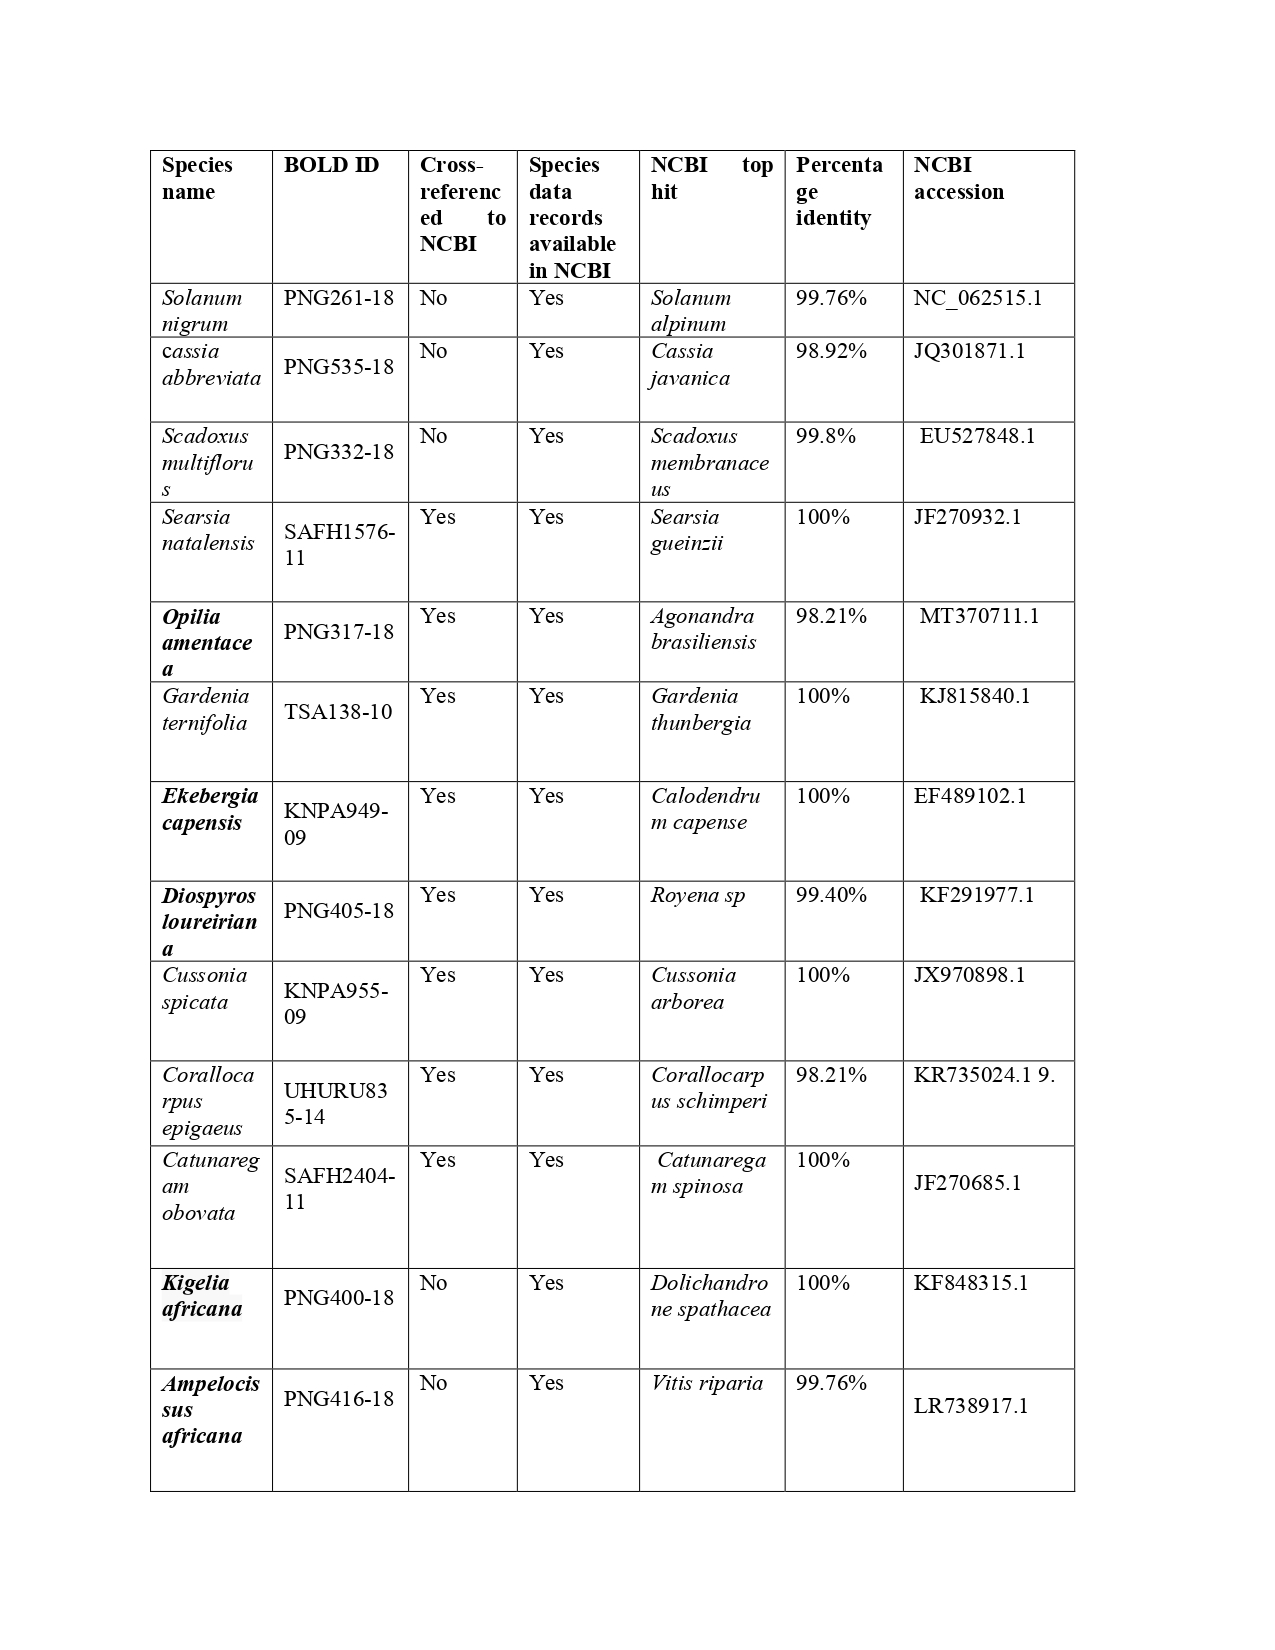

In [2]:
from IPython.display import Image, display
display(Image("discrepancies_page-0001.jpg"))


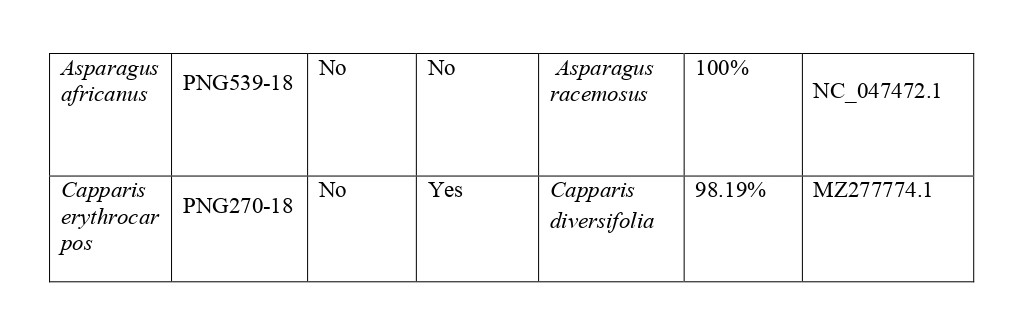

In [3]:
from IPython.display import Image, display
display(Image("plants_page2.jpg"))


In [276]:
# final db to csv
df_matk_to_db=pd.read_csv('matk_final_sep_with_database_columns.csv')
df_matk_to_db

,matk_id,plant_id,nucleotide,country,genbank_accession,bold_id
0,1,1,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,Kenya,KR734379,UHURU142-14
1,2,1,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,Kenya,KR734637,UHURU143-14
2,3,1,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,Kenya,KR734738,UHURU144-14
3,4,2,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,Kenya,KR734566,UHURU948-14
4,5,2,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,Kenya,KR734848,UHURU949-14
...,...,...,...,...,...,...
680,681,880,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,Mozambique,NaN,PNG094-18
681,682,880,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,Kenya,MK285045,UHURU1619-15
682,683,881,---------------------------TCTTCTTTGCATTTATTAC...,Mozambique,JX517471,TSA107-10
683,684,882,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,United States,OL690208,GRDMO281-21


## Filter Questionable, Low quality, low base pair matk sequences and barcodes with less than 400 base pairs from original downloaded matk sequences

In [294]:
barcodes_with_low_quality_from_bold=rows_with_low_quality_from_bold["processid"].to_list()
print(f"Barcodes flagged to be of poor quality from BOLD:{barcodes_with_low_quality_from_bold}")
barcodes_less_than_400_bp=rows_with_low_quality_from_bold["processid"].to_list()
barcodes_less_than400=df_matk_below400["processid"].to_list()
print(barcodes_less_than400)
## We will fikter out sequneces that matched different genus i.e the ones bolded out in the list of questionable sequnces
questionable_barcode_after_blast=["PNG317-18","KNPA949-09","PNG400-18","PNG416-18","PNG405-18"]
all_fillterable_matk=barcodes_with_low_quality_from_bold+barcodes_less_than400+questionable_barcode_after_blast
print("Totla matk filtered")
print(len(all_questionable_matk))
all_fillterable_matk

Barcodes flagged to be of poor quality from BOLD:['UHURU933-14', 'PNG288-18']
['UHURU950-14', 'UHURU822-14', 'UHURU823-14', 'UHURU817-14', 'UHURU1278-15', 'UHURU1302-15', 'UHURU1326-15', 'UHURU861-14', 'UHURU1648-15', 'UHURU101-14', 'UHURU102-14', 'UHURU103-14', 'UHURU104-14', 'UHURU974-14', 'UHURU1649-15', 'UHURU444-14', 'UHURU493-14', 'UHURU525-14', 'UHURU1651-15', 'UHURU013-14', 'UHURU471-14', 'UHURU487-14', 'UHURU1342-15', 'UHURU840-14', 'UHURU730-14', 'KNPA1158-09']
Totla matk filtered
33


['UHURU933-14',
 'PNG288-18',
 'UHURU950-14',
 'UHURU822-14',
 'UHURU823-14',
 'UHURU817-14',
 'UHURU1278-15',
 'UHURU1302-15',
 'UHURU1326-15',
 'UHURU861-14',
 'UHURU1648-15',
 'UHURU101-14',
 'UHURU102-14',
 'UHURU103-14',
 'UHURU104-14',
 'UHURU974-14',
 'UHURU1649-15',
 'UHURU444-14',
 'UHURU493-14',
 'UHURU525-14',
 'UHURU1651-15',
 'UHURU013-14',
 'UHURU471-14',
 'UHURU487-14',
 'UHURU1342-15',
 'UHURU840-14',
 'UHURU730-14',
 'KNPA1158-09',
 'PNG317-18',
 'KNPA949-09',
 'PNG400-18',
 'PNG416-18',
 'PNG405-18']

## FIltering matk 

In [280]:
## Filtering
df_matk_to_db_filtered = df_matk_to_db[~df_matk_to_db["bold_id"].isin(all_fillterable_matk)]
df_matk_to_db_filtered

,matk_id,plant_id,nucleotide,country,genbank_accession,bold_id
0,1,1,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,Kenya,KR734379,UHURU142-14
1,2,1,TTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTAAT...,Kenya,KR734637,UHURU143-14
2,3,1,GCTTCTTCTTTGCATTTATTACGGTTCTCTCTCTACGAGTATTGTA...,Kenya,KR734738,UHURU144-14
3,4,2,CCTATATAATTCTCATGTATGTGAATACGAGTCCATTTTCCTTTTT...,Kenya,KR734566,UHURU948-14
4,5,2,CTTCTCATTTACGATCAACATCTTCTGGAGTCTTTCTTGAACGAAT...,Kenya,KR734848,UHURU949-14
...,...,...,...,...,...,...
680,681,880,ACTCTTTTTTTTTGAGGATCCGCTGAAATAATGAGAAAGATGTCTG...,Mozambique,NaN,PNG094-18
681,682,880,CTTTGCATTTATTACGGCTTTTTCTTCACGAGTATTATAATTGGAA...,Kenya,MK285045,UHURU1619-15
682,683,881,---------------------------TCTTCTTTGCATTTATTAC...,Mozambique,JX517471,TSA107-10
683,684,882,AATTATGTATCAGATGTACGAATACCCTACCCCATTCATCTGGAAA...,United States,OL690208,GRDMO281-21


## Save filteted matk to file for uplaod in the database as a CSV file

In [283]:
df_matk_to_db_filtered.to_csv("final_filtered_matk_filtered.csv",index=False)

# Insects COI barcodes  K2P Analysis

In [198]:
df_coi=pd.read_csv('COI-5P_sep_final.csv')
col=["processid","species_name","country","genbank_accession","species_id","nucleotides"]
df_coi=df_coi[col]
df_coi

,processid,species_name,country,genbank_accession,species_id,nucleotides
0,AFMIC184-12,Blastobasis kenya,Kenya,KF643041,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...
1,AFRM012-12,Blastobasis kenya,Kenya,KF643039,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...
2,AFRM023-12,Blastobasis kenya,Kenya,KF643042,2.0,----------------------------------------------...
3,AFRM028-12,Blastobasis kenya,Kenya,KF643038,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...
4,HCBK009-03,Blastobasis kenya,Kenya,GQ330222,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...
...,...,...,...,...,...,...
710,PMANK904-08,Yponomeuta strigillata,Kenya,KF643201,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...
711,PMANK913-08,Yponomeuta strigillata,Kenya,KF643206,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...
712,PMANK916-08,Yponomeuta strigillata,Kenya,KF643208,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...
713,PMANL2551-12,Yponomeuta strigillata,Kenya,KF643205,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...


## Find COI barcodes flagged as low quality form BOLD

In [284]:
coi_with_low_quality_from_bold = df_coi[df_coi["nucleotides"].isna()]
coi_with_low_quality_from_bold

,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence
586,ANICN869-10,Hodebertia testalis,Australia,NaN,142.0,NaN,NaN


# Find COI with less than 400 base pairs
We found 8 COI sequnces that had less than 400 bas pairs

In [285]:
## # Drop sequences with length below 500bp
df_coi_below400= df_coi[df_coi['sequence'].str.len() <400]
print(f"The barcode less than 400 are {df_coi_below400.shape[0]}")

The barcode less than 400 are 8


In [200]:
# len(df_coi["species_name"].unique())

In [201]:
df_coi['sequence'] = df_coi['nucleotides'].str.replace("-","")
df_coi

,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence
0,AFMIC184-12,Blastobasis kenya,Kenya,KF643041,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...
1,AFRM012-12,Blastobasis kenya,Kenya,KF643039,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...
2,AFRM023-12,Blastobasis kenya,Kenya,KF643042,2.0,----------------------------------------------...,ATAATTTTTTTTATAGTAATACCAATTATAATTGGAGGATTTGGAA...
3,AFRM028-12,Blastobasis kenya,Kenya,KF643038,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...
4,HCBK009-03,Blastobasis kenya,Kenya,GQ330222,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...
...,...,...,...,...,...,...,...
710,PMANK904-08,Yponomeuta strigillata,Kenya,KF643201,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...
711,PMANK913-08,Yponomeuta strigillata,Kenya,KF643206,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...
712,PMANK916-08,Yponomeuta strigillata,Kenya,KF643208,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...
713,PMANL2551-12,Yponomeuta strigillata,Kenya,KF643205,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...


## COI Sequences flagged as of poor quality by BOLD

In [202]:
# Get rows with NA to show sequences flagged as of poor quality
# Check the number of missing values in the "sequence" column
na_count_coi = df_coi["sequence"].isna().sum()
#remove N's
# na_count_coi['sequence'] = na_count_coi['nucleotides'].str.replace("-","")

# Get the rows with missing values in the "sequence" column
rows_with_na = df_coi[df_coi["sequence"].isna()]

# Print the resulting rows
print(rows_with_na)

       processid         species_name    country genbank_accession  \
586  ANICN869-10  Hodebertia testalis  Australia               NaN   

     species_id nucleotides sequence  
586       142.0         NaN      NaN  


## Finding barcode sequence length

In [203]:
# Read the whole dataframe and coi dataframes
import pandas as pd
# # df_all_species['new Plant family'].to_list
df_coi_dropped = df_coi.drop([586])
df_coi_dropped
# # na_count_coi['sequence'] = df_coi_dropped['sequence'].str.replace("-","")

df_coi_dropped['sequence'] = df_coi_dropped['sequence'].str.replace("N","").replace("-",'')
df_coi_dropped['length']=df_coi_dropped['sequence'].apply(lambda x: len(x))
df_coi_dropped


,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence,length
0,AFMIC184-12,Blastobasis kenya,Kenya,KF643041,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658
1,AFRM012-12,Blastobasis kenya,Kenya,KF643039,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,307
2,AFRM023-12,Blastobasis kenya,Kenya,KF643042,2.0,----------------------------------------------...,ATAATTTTTTTTATAGTAATACCAATTATAATTGGAGGATTTGGAA...,513
3,AFRM028-12,Blastobasis kenya,Kenya,KF643038,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658
4,HCBK009-03,Blastobasis kenya,Kenya,GQ330222,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,CTGGATAGTAGGAACCTCCCTTAGATTACTAGTTCGTGCTGAATTA...,599
...,...,...,...,...,...,...,...,...
710,PMANK904-08,Yponomeuta strigillata,Kenya,KF643201,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658
711,PMANK913-08,Yponomeuta strigillata,Kenya,KF643206,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658
712,PMANK916-08,Yponomeuta strigillata,Kenya,KF643208,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658
713,PMANL2551-12,Yponomeuta strigillata,Kenya,KF643205,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658


## Drop COI sequences with less than 400 base pais

In [204]:
# # Drop sequences with length below 400bp
df_coi_above400 = df_coi_dropped[df_coi_dropped['sequence'].str.len() >=400]
len(df_coi_above400["species_name"].unique())

86

In [205]:
df_coi_above400.columns

Index(['processid', 'species_name', 'country', 'genbank_accession',
       'species_id', 'nucleotides', 'sequence', 'length'],
      dtype='object')

In [206]:
# reset index
df_coi_above400=df_coi_above400.reset_index(drop=True)
df_coi_above400
# add coi_id_column column
df_coi_above400['coi_id'] = df_coi_above400.index +1
df_coi_above400

,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence,length,coi_id
0,AFMIC184-12,Blastobasis kenya,Kenya,KF643041,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,1
1,AFRM023-12,Blastobasis kenya,Kenya,KF643042,2.0,----------------------------------------------...,ATAATTTTTTTTATAGTAATACCAATTATAATTGGAGGATTTGGAA...,513,2
2,AFRM028-12,Blastobasis kenya,Kenya,KF643038,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,3
3,HCBK009-03,Blastobasis kenya,Kenya,GQ330222,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,CTGGATAGTAGGAACCTCCCTTAGATTACTAGTTCGTGCTGAATTA...,599,4
4,HCBK017-03,Blastobasis kenya,Kenya,GQ330227,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,5
...,...,...,...,...,...,...,...,...,...
696,PMANK904-08,Yponomeuta strigillata,Kenya,KF643201,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,697
697,PMANK913-08,Yponomeuta strigillata,Kenya,KF643206,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,698
698,PMANK916-08,Yponomeuta strigillata,Kenya,KF643208,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,699
699,PMANL2551-12,Yponomeuta strigillata,Kenya,KF643205,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,700


In [207]:
# add coi_id_column column
df_coi_above400['coi_id'] = df_coi_above400.index +1
df_coi_above400
# rename the columns
df_coi_above400_to_db=df_coi_above400.rename(columns={"species_id":"insect_id","nucleotides":"nucleotide","processid":"bold_id"})
df_coi_above400_to_db=df_coi_above400_to_db[["coi_id","insect_id","nucleotide","country","genbank_accession","bold_id"]]
df_coi_above400_to_db

,coi_id,insect_id,nucleotide,country,genbank_accession,bold_id
0,1,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,Kenya,KF643041,AFMIC184-12
1,2,2.0,----------------------------------------------...,Kenya,KF643042,AFRM023-12
2,3,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,Kenya,KF643038,AFRM028-12
3,4,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,Kenya,GQ330222,HCBK009-03
4,5,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,Kenya,GQ330227,HCBK017-03
...,...,...,...,...,...,...
696,697,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643201,PMANK904-08
697,698,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643206,PMANK913-08
698,699,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643208,PMANK916-08
699,700,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643205,PMANL2551-12


In [208]:
# save file to csv 
df_coi_above400_to_db.to_csv("insects_coi_to_db.csv")

In [209]:
# df_coi_above400.to_csv("insects_coi.csv",index=False)

In [210]:
df_coi_less400 = df_coi_dropped[df_coi_dropped['sequence'].str.len() <400]
len(df_coi_less400["species_name"].unique())

5

In [211]:
len(df_coi["species_name"].unique())

87

In [212]:
len(list(df_coi["species_name"].unique()))

87

In [213]:
df_coi["species_id"].dtypes

dtype('float64')

In [214]:
# filtered_datinsects = df_coi_less400[result_data['Intraspecific Maximum Distance'] > 0.02]
# filtered_datinsects
df_coi_above400

,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence,length,coi_id
0,AFMIC184-12,Blastobasis kenya,Kenya,KF643041,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,1
1,AFRM023-12,Blastobasis kenya,Kenya,KF643042,2.0,----------------------------------------------...,ATAATTTTTTTTATAGTAATACCAATTATAATTGGAGGATTTGGAA...,513,2
2,AFRM028-12,Blastobasis kenya,Kenya,KF643038,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,3
3,HCBK009-03,Blastobasis kenya,Kenya,GQ330222,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,CTGGATAGTAGGAACCTCCCTTAGATTACTAGTTCGTGCTGAATTA...,599,4
4,HCBK017-03,Blastobasis kenya,Kenya,GQ330227,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,5
...,...,...,...,...,...,...,...,...,...
696,PMANK904-08,Yponomeuta strigillata,Kenya,KF643201,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,697
697,PMANK913-08,Yponomeuta strigillata,Kenya,KF643206,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,698
698,PMANK916-08,Yponomeuta strigillata,Kenya,KF643208,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,699
699,PMANL2551-12,Yponomeuta strigillata,Kenya,KF643205,182.0,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,658,700


## Extract COI sequnces and convert to fasta file

In [215]:
convert_to_fasta(df_coi_above400,"insect_families_august_new.fasta")

In [216]:
# Open the file for writing
with open("./aligned_files/insects_one.txt", "w") as f1:
    # Write an empty list to the file
    # empty_list = []
    f1.write(str(empty))

# The file "plants_one.txt" now contains the string representation of an empty list
print(len(set(many)))
print(len(empty))


193
298


In [217]:
# from IPython.display import Image, display
# # Display the image
# display(Image("Species name_page-0001.jpg"))


# COI barcode sequence Alignment with MAFFT
The COI sequences were also aligned using MAFFT and MEGA software used to compute K2P genetic distance metrics

## Loading COI distance matrix for analysis

In [218]:
# import dsiatance matrix
import numpy as np
import pandas as pd

# Load the distance matrix
distance_data = pd.read_csv('aligned_files/insects_distance_k2p', index_col=0)

# Convert the DataFrame to a NumPy array
distance_matrix = distance_data.to_numpy()

# Get the shape of the distance matrix
n = distance_matrix.shape[0]

# Fill the upper diagonal with the same non-NaN values as the lower diagonal
for i in range(n):
    for j in range(i + 1, n):
        if not np.isnan(distance_matrix[i, j]):
            distance_matrix[j, i] = distance_matrix[i, j]
        elif not np.isnan(distance_matrix[j, i]):
            distance_matrix[i, j] = distance_matrix[j, i]
            # print(distance_matrix[j, i])


# Convert the updated distance matrix back to a DataFrame
updated_distance_data = pd.DataFrame(distance_matrix, index=distance_data.index, columns=distance_data.columns)

# Print the updated distance matrix
updated_distance_data
updated_distance_data = distance_data.fillna(0)
updated_distance_data

,Blastobasis_kenya_2.0_KF643041_AFMIC184-12,Blastobasis_kenya_2.0_KF643040_AFMIC188-12,Blastobasis_kenya_2.0_KF643042_AFRM023-12,Blastobasis_kenya_2.0_GQ330222_HCBK009-03,Blastobasis_kenya_2.0_GQ330221_HCBK042-05,Blastobasis_kenya_2.0_GQ330223_HCBK043-05,Blastobasis_kenya_2.0_GQ330274_HCBK044-05,Blastobasis_kenya_2.0_GQ330224_HCBK045-05,Blastobasis_kenya_2.0_GQ330225_HCBK046-05,Blastobasis_kenya_2.0_GQ330272_HCBK047-05,...,Trirhithrum_nigerrimum_171.0_nan_MVTBI164-08,Yponomeuta_strigillata_182.0_KF643202_AFMIC168-12,Yponomeuta_strigillata_182.0_nan_LNAUT1922-14,Yponomeuta_strigillata_182.0_KF643207_PMANK893-08,Yponomeuta_strigillata_182.0_KF643203_PMANK902-08,Yponomeuta_strigillata_182.0_KF643201_PMANK904-08,Yponomeuta_strigillata_182.0_KF643206_PMANK913-08,Yponomeuta_strigillata_182.0_KF643208_PMANK916-08,Yponomeuta_strigillata_182.0_KF643205_PMANL2551-12,Yponomeuta_strigillata_182.0_KF643204_PMANL2552-12
Blastobasis_kenya_2.0_KF643041_AFMIC184-12,0.000000,0.000000,0.005882,0.008406,0.006700,0.005008,0.005051,0.000000,0.000000,0.003268,...,0.225318,0.168251,0.164383,0.162460,0.168251,0.168251,0.168251,0.166313,0.168251,0.162341
Blastobasis_kenya_2.0_KF643040_AFMIC188-12,0.000000,0.000000,0.005882,0.008406,0.006700,0.005008,0.005051,0.000000,0.000000,0.003268,...,0.225318,0.168251,0.164383,0.162460,0.168251,0.168251,0.168251,0.166313,0.168251,0.162341
Blastobasis_kenya_2.0_KF643042_AFRM023-12,0.005882,0.005882,0.000000,0.006237,0.000000,0.008214,0.000000,0.006186,0.004255,0.005882,...,0.223113,0.170138,0.177657,0.167656,0.170138,0.170138,0.170138,0.172632,0.170138,0.165078
Blastobasis_kenya_2.0_GQ330222_HCBK009-03,0.008406,0.008406,0.006237,0.000000,0.005051,0.001684,0.005085,0.003373,0.001718,0.000000,...,0.242267,0.180573,0.180573,0.176263,0.180573,0.180573,0.180573,0.182742,0.180573,0.180423
Blastobasis_kenya_2.0_GQ330221_HCBK042-05,0.006700,0.006700,0.000000,0.005051,0.000000,0.006723,0.000000,0.005034,0.003442,0.005119,...,0.239031,0.175714,0.175714,0.171440,0.175714,0.175714,0.175714,0.177864,0.175714,0.173427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yponomeuta_strigillata_182.0_KF643201_PMANK904-08,0.168251,0.168251,0.170138,0.180573,0.175714,0.179686,0.174885,0.176377,0.175269,0.173618,...,0.217165,0.000000,0.015433,0.004580,0.000000,0.000000,0.000000,0.001522,0.000000,0.064024
Yponomeuta_strigillata_182.0_KF643206_PMANK913-08,0.168251,0.168251,0.170138,0.180573,0.175714,0.179686,0.174885,0.176377,0.175269,0.173618,...,0.217165,0.000000,0.015433,0.004580,0.000000,0.000000,0.000000,0.001522,0.000000,0.064024
Yponomeuta_strigillata_182.0_KF643208_PMANK916-08,0.166313,0.166313,0.172632,0.182742,0.177864,0.181850,0.177044,0.174226,0.175269,0.175718,...,0.217165,0.001522,0.013868,0.006116,0.001522,0.001522,0.001522,0.000000,0.001522,0.062324
Yponomeuta_strigillata_182.0_KF643205_PMANL2551-12,0.168251,0.168251,0.170138,0.180573,0.175714,0.179686,0.174885,0.176377,0.175269,0.173618,...,0.217165,0.000000,0.015433,0.004580,0.000000,0.000000,0.000000,0.001522,0.000000,0.064024


In [219]:
import numpy as np
import pandas as pd

def compute_intraspecific_distances(distance_matrix, species_names):
    unique_species, species_counts = np.unique(species_names, return_counts=True)
    n = len(unique_species)  # Number of unique species

    intraspecific_mean = np.zeros(n)
    intraspecific_max = np.zeros(n)
    intraspecific_min = np.zeros(n)
    species_data = {}  # Dictionary to store filtered data for each species

    for i, species in enumerate(unique_species):
        indices = [idx for idx, name in enumerate(species_names) if species in name]
        distances = []
        for index in indices:
            row = distance_matrix[index]
            row_without_self = np.delete(row, index)  # Remove distances to self
            distances.extend(row_without_self)

        distances = np.array(distances)
        sliced_data = updated_distance_data.iloc[indices, indices]
        # Step 2: Extract the upper triangle values of the datafram
        values = sliced_data.where(np.triu(np.ones(sliced_data.shape), k=1).astype(bool))

        # Step 3: Calculate the sum of upper triangle values
        total_distance = values.sum().sum()

        # Step 4: Determine the number of unique distances
        num_distances = n

        # Step 5: Compute the mean distance
        mean_distance = total_distance / num_distances
        mean_distance

        intraspecific_mean[i] = mean_distance # Mean value
        intraspecific_max[i] = values.max().max()     # Maximum value
        intraspecific_min[i] = values.min().min()     # Minimum value

        species_data[species] = sliced_data  # Store filtered data for each species

    return intraspecific_mean, intraspecific_max, intraspecific_min, species_counts, species_data

# Read the CSV file
distance_data = updated_distance_data

# Extract species names from the column and row names
species_genus_names = distance_data.columns.str.split('_', n=1)
species_names = [name[0] + "_" + name[1].split("_")[0] for name in species_genus_names]

# Compute intraspecific distances and get the updated 'n', species counts, and species data
intraspecific_mean, intraspecific_max, intraspecific_median, species_counts, species_data = compute_intraspecific_distances(distance_data.values, species_names)

# Create a DataFrame to store the results
result_data = pd.DataFrame({'Species': np.unique(species_names),
                            'Intraspecific Mean Distance': intraspecific_mean / species_counts,  # Divide by species count
                            'Intraspecific Maximum Distance': intraspecific_max,
                            'Intraspecific Minimum Distance': intraspecific_median,
                            'N': species_counts})  # Use species_counts as the 'n' values

# Convert species data dictionary to DataFrames
species_data_frames = {species: data_frame.reset_index(drop=True) for species, data_frame in species_data.items()}

# Return the results as a dictionary of species and filtered data DataFrames
results = {
    'result_data': result_data,
    'species_data_frames': species_data_frames
}

result_data

,Species,Intraspecific Mean Distance,Intraspecific Maximum Distance,Intraspecific Minimum Distance,N
0,Afroploce_karsholti,0.000069,0.003049,0.001521,4
1,Anthozela_chrysoxantha,0.000746,0.028017,0.000000,5
2,Bactrocera_munroi,0.000000,0.000000,0.000000,2
3,Bactrocera_oleae,0.000066,0.003571,0.000000,18
4,Blastobasis_kenya,0.004808,0.051666,0.000000,57
5,Capparimyia_melanaspis,0.000468,0.026452,0.003521,4
6,Carpophthoromyia_dimidiata,0.000103,0.010336,0.010336,2
7,Celidodacus_obnubilus,0.000138,0.013820,0.013820,2
8,Ceratitis_anonae,0.001277,0.016927,0.000000,15
9,Ceratitis_bremii,0.004230,0.091477,0.003049,12


In [220]:
sum(result_data["Intraspecific Mean Distance"]==0)

2

In [221]:
print(max(df_coi_above400["length"]))
min(df_coi_dropped["length"])

888


235

## Plotting the intraspecific mean, minimum, and maximum distances for COI barcodes


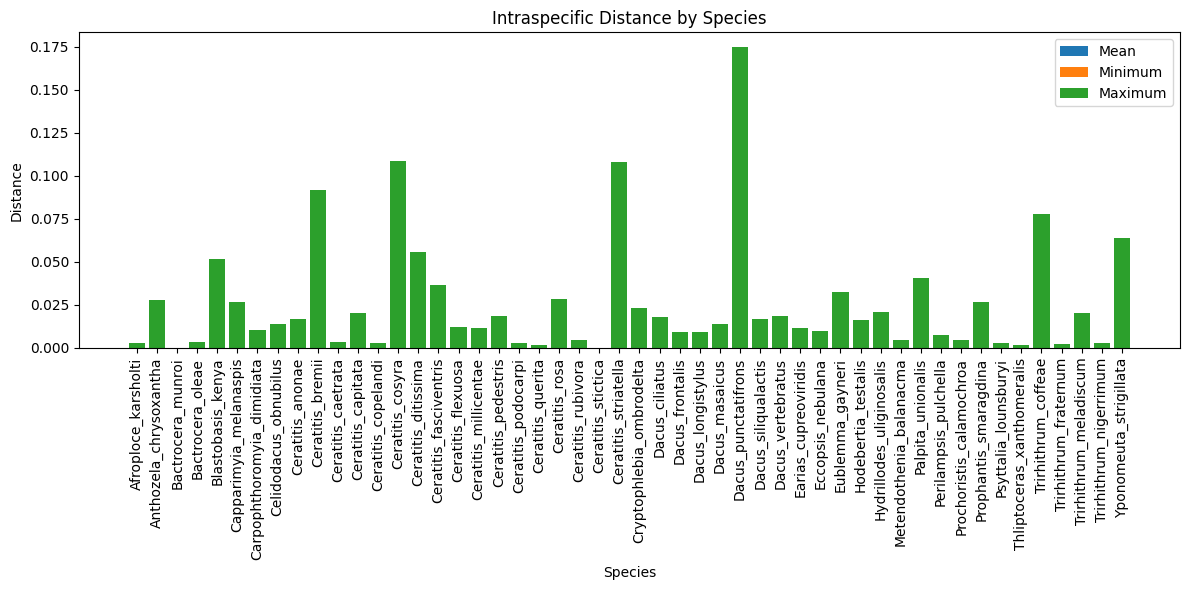

In [222]:
import matplotlib.pyplot as plt

# Plotting the intraspecific mean, minimum, and maximum distances
plt.figure(figsize=(12, 6))
plt.bar(result_data['Species'], result_data['Intraspecific Mean Distance'], label='Mean')
plt.bar(result_data['Species'], result_data['Intraspecific Minimum Distance'], label='Minimum')
plt.bar(result_data['Species'], result_data['Intraspecific Maximum Distance'], label='Maximum')

plt.xlabel('Species')
plt.ylabel('Distance')
plt.title('Intraspecific Distance by Species')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## Intraspecific Distance of insect species with maximum K2P Genetic Distance >0.02

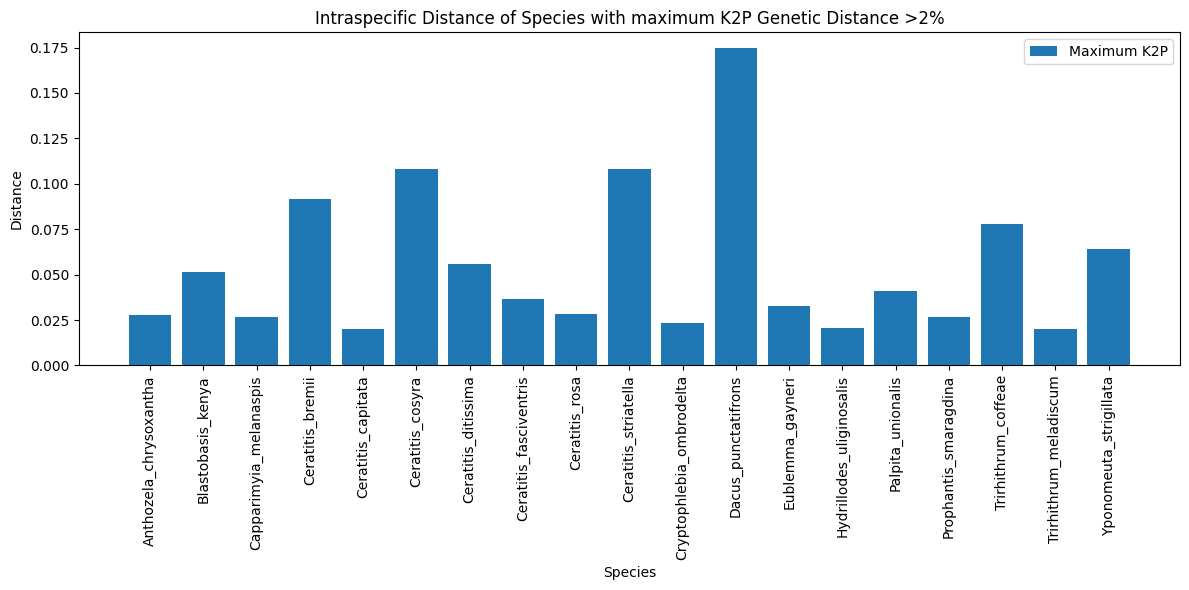

In [223]:
import matplotlib.pyplot as plt

# Filter the data based on the condition
filtered_data = result_data[result_data['Intraspecific Maximum Distance'] > 0.02]

# Plotting the intraspecific mean, minimum, and maximum distances
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Species'], filtered_data['Intraspecific Maximum Distance'], label='Maximum K2P')

plt.xlabel('Species')
plt.ylabel('Distance')
plt.title('Intraspecific Distance of Species with maximum K2P Genetic Distance >2%')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('genetic_relatedness_more_than_2_percente.png')
plt.show()


In [224]:
b=list(filtered_data["Species"])
b

['Anthozela_chrysoxantha',
 'Blastobasis_kenya',
 'Capparimyia_melanaspis',
 'Ceratitis_bremii',
 'Ceratitis_capitata',
 'Ceratitis_cosyra',
 'Ceratitis_ditissima',
 'Ceratitis_fasciventris',
 'Ceratitis_rosa',
 'Ceratitis_striatella',
 'Cryptophlebia_ombrodelta',
 'Dacus_punctatifrons',
 'Eublemma_gayneri',
 'Hydrillodes_uliginosalis',
 'Palpita_unionalis',
 'Prophantis_smaragdina',
 'Trirhithrum_coffeae',
 'Trirhithrum_meladiscum',
 'Yponomeuta_strigillata']

## Box Plot of Significant Differences in Similarity Values for Insect Species with K2P> 0.02

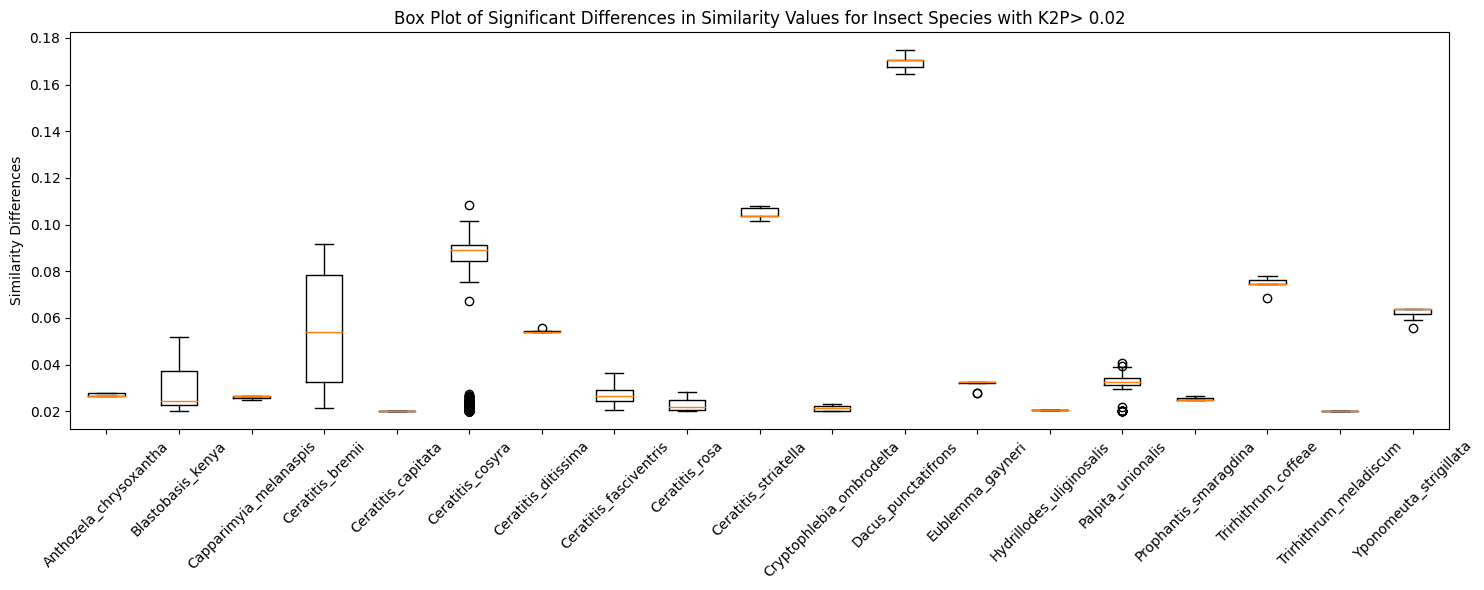

In [225]:
import numpy as np
import matplotlib.pyplot as plt

# Group the DataFrame by species column
grouped = results.get("species_data_frames")
species_data = []

# Loop through each grouped species and accumulate the similarity differences
for species, df_species in grouped.items():
    if species in b:
        # print(species)
        upper_tri = np.triu(df_species.values, k=1)
        upper_diagonal_values = upper_tri[upper_tri > 0.02]
        species_data.append((species, upper_diagonal_values))

# Extract species names and corresponding data for plotting
species_names, all_data = zip(*species_data)

# Increase the size of the plot
plt.figure(figsize=(15, 6))  # Adjust the values as needed

# Create a single box plot for all species
plt.boxplot(all_data, labels=species_names)
plt.title("Box Plot of Significant Differences in Similarity Values for Insect Species with K2P> 0.02")
plt.ylabel("Similarity Differences")
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures that labels don't overlap
plt.show()


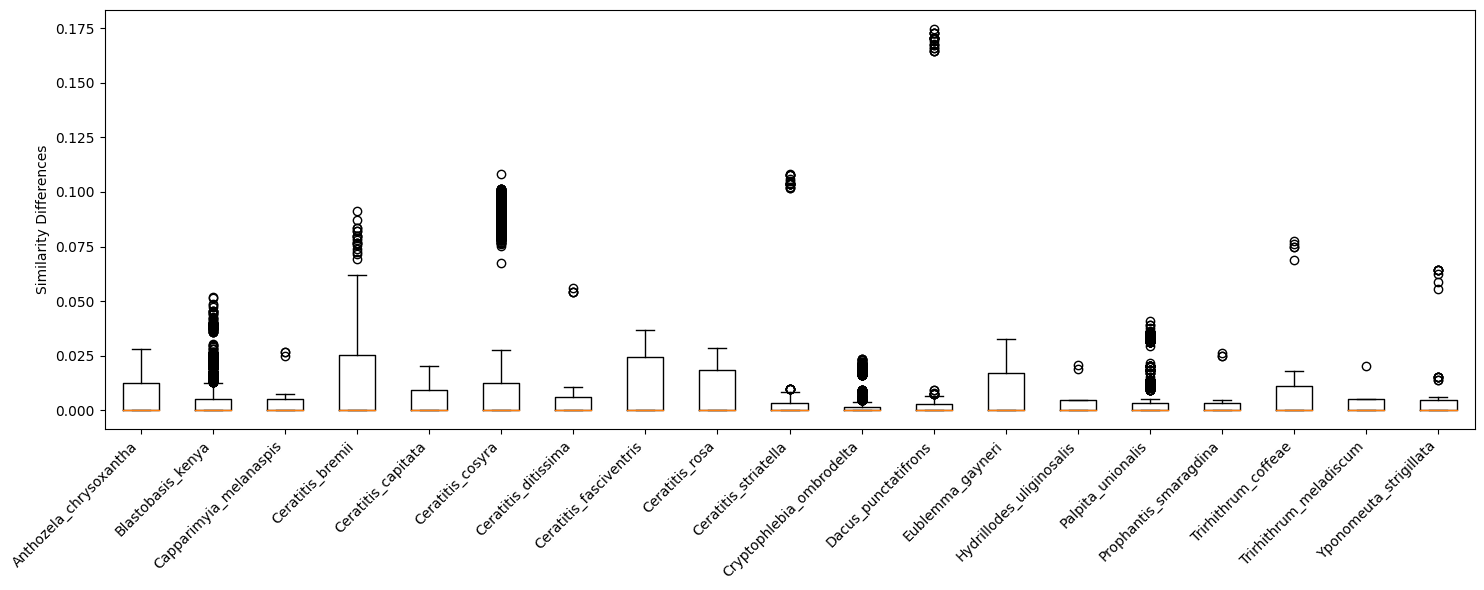

In [226]:
import numpy as np
import matplotlib.pyplot as plt

# Group the DataFrame by species column
grouped = results.get("species_data_frames")
species_data = []

# Loop through each grouped species and accumulate the similarity differences
for species, df_species in grouped.items():
    if species in b:
        upper_tri = np.triu(df_species.values, k=1)
        upper_diagonal_values = upper_tri[upper_tri >= 0]
        species_data.append((species, upper_diagonal_values))

# Extract species names and corresponding data for plotting
species_names, all_data = zip(*species_data)

# Increase the size of the plot
plt.figure(figsize=(15, 6))  # Adjust the values as needed

# Create a single box plot for all species
box = plt.boxplot(all_data, labels=species_names)
# plt.title("Box Plot of intrasecific distances for insect species with maximum K2P > 0.02")
plt.ylabel("Similarity Differences")

# Adjust x-axis label rotation for better alignment
plt.xticks(rotation=45, ha="right")  # Adding 'ha="right"' parameter

# Ensure enough space for the rotated labels
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()  
plt.savefig("insect_similarity_differences_boxplot_oct.png")  # You can adjust the file name and DPI as needed
plt.show()


## Exploration of insect each sinsect pecies distances
We expored distance matrix for each species and used the BOLD id to access the sequennces from BOLD database

In [227]:
Anthozela_chrysoxantha =df_coi_above400.groupby("species_name").get_group("Anthozela chrysoxantha")
Anthozela_chrysoxantha 

,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence,length,coi_id
606,AFTOR150-12,Anthozela chrysoxantha,Kenya,KJ592337,152.0,AACATTATATTTTATTTTTGGAATCTGAGCTGGAATAGTAGGAACA...,AACATTATATTTTATTTTTGGAATCTGAGCTGGAATAGTAGGAACA...,658,607
607,AFTOR151-12,Anthozela chrysoxantha,Kenya,KJ592360,152.0,AACATTATATTTTATTTTTGGAATCTGAGCTGGAATAGTAGGAACA...,AACATTATATTTTATTTTTGGAATCTGAGCTGGAATAGTAGGAACA...,658,608
608,AFTOR152-12,Anthozela chrysoxantha,Kenya,KJ592419,152.0,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACA...,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACA...,658,609
609,AFTOR153-12,Anthozela chrysoxantha,Kenya,KJ592278,152.0,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACA...,AACATTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACA...,658,610
610,LSAFR256-12,Anthozela chrysoxantha,South Africa,NaN,152.0,AACATTATATTTTATTTTTGGAATCTGAGCTGGAATAATAGGAACA...,AACATTATATTTTATTTTTGGAATCTGAGCTGGAATAATAGGAACA...,658,611


In [228]:
# Blastobasis_kenya=df_coi_above400.groupby("species_name").get_group("Blastobasis kenya")
# Blastobasis_kenya

In [229]:
Anthozela_chrysoxantha =results.get("species_data_frames").get("Anthozela_chrysoxantha")
Anthozela_chrysoxantha 


,Anthozela_chrysoxantha_152.0_KJ592337_AFTOR150-12,Anthozela_chrysoxantha_152.0_KJ592360_AFTOR151-12,Anthozela_chrysoxantha_152.0_KJ592419_AFTOR152-12,Anthozela_chrysoxantha_152.0_KJ592278_AFTOR153-12,Anthozela_chrysoxantha_152.0_nan_LSAFR256-12
0,0.000000,0.000000,0.026452,0.026452,0.012291
1,0.000000,0.000000,0.026452,0.026452,0.012291
2,0.026452,0.026452,0.000000,0.000000,0.028017
3,0.026452,0.026452,0.000000,0.000000,0.028017
4,0.012291,0.012291,0.028017,0.028017,0.000000


In [230]:
Blastobasis_kenya=results.get("species_data_frames").get("Blastobasis_kenya")
Blastobasis_kenya
# Find the row index with the maximum value
# Find the maximum value in each row
# Blastobasis_kenya = results.get("species_data_frames").get("Blastobasis_kenya")
# max_values_per_row = Blastobasis_kenya.max(axis=1)

# row_with_max_value = max_values_per_row
# row_with_max_value

,Blastobasis_kenya_2.0_KF643041_AFMIC184-12,Blastobasis_kenya_2.0_KF643040_AFMIC188-12,Blastobasis_kenya_2.0_KF643042_AFRM023-12,Blastobasis_kenya_2.0_GQ330222_HCBK009-03,Blastobasis_kenya_2.0_GQ330221_HCBK042-05,Blastobasis_kenya_2.0_GQ330223_HCBK043-05,Blastobasis_kenya_2.0_GQ330274_HCBK044-05,Blastobasis_kenya_2.0_GQ330224_HCBK045-05,Blastobasis_kenya_2.0_GQ330225_HCBK046-05,Blastobasis_kenya_2.0_GQ330272_HCBK047-05,...,Blastobasis_kenya_2.0_GQ330257_HCBK160-05,Blastobasis_kenya_2.0_GQ330258_HCBK161-05,Blastobasis_kenya_2.0_GQ330275_HCBK162-05,Blastobasis_kenya_2.0_GQ330260_HCBK164-05,Blastobasis_kenya_2.0_GQ330264_HCBK172-05,Blastobasis_kenya_2.0_KF643038_AFRM028-12,Blastobasis_kenya_2.0_GQ330227_HCBK017-03,Blastobasis_kenya_2.0_GQ330232_HCBK066-05,Blastobasis_kenya_2.0_GQ330235_HCBK070-05,Blastobasis_kenya_2.0_GQ330256_HCBK170-05
0,0.000000,0.000000,0.005882,0.008406,0.006700,0.005008,0.005051,0.000000,0.000000,0.003268,...,0.006757,0.006745,0.004580,0.004580,0.008527,0.003049,0.037421,0.012980,0.003378,0.006116
1,0.000000,0.000000,0.005882,0.008406,0.006700,0.005008,0.005051,0.000000,0.000000,0.003268,...,0.006757,0.006745,0.004580,0.004580,0.008527,0.003049,0.037421,0.012980,0.003378,0.006116
2,0.005882,0.005882,0.000000,0.006237,0.000000,0.008214,0.000000,0.006186,0.004255,0.005882,...,0.006198,0.000000,0.000000,0.005882,0.004158,0.005882,0.044203,0.008853,0.006237,0.001953
3,0.008406,0.008406,0.006237,0.000000,0.005051,0.001684,0.005085,0.003373,0.001718,0.000000,...,0.006791,0.005051,0.010103,0.006714,0.008527,0.005027,0.044756,0.014857,0.000000,0.011807
4,0.006700,0.006700,0.000000,0.005051,0.000000,0.006723,0.000000,0.005034,0.003442,0.005119,...,0.005059,0.000000,0.001667,0.008389,0.010248,0.006700,0.039306,0.014857,0.005076,0.003339
5,0.005008,0.005008,0.008214,0.001684,0.006723,0.000000,0.006745,0.005034,0.003442,0.001692,...,0.008460,0.006768,0.006689,0.003333,0.010248,0.001664,0.042772,0.016740,0.001686,0.008375
6,0.005051,0.005051,0.000000,0.005085,0.000000,0.006745,0.000000,0.005051,0.003454,0.005119,...,0.005059,0.000000,0.000000,0.006745,0.010248,0.005051,0.037804,0.014857,0.005085,0.001678
7,0.000000,0.000000,0.006186,0.003373,0.005034,0.005034,0.005051,0.000000,0.000000,0.003407,...,0.006757,0.005068,0.005034,0.005034,0.008527,0.003350,0.039441,0.012980,0.003378,0.006723
8,0.000000,0.000000,0.004255,0.001718,0.003442,0.003442,0.003454,0.000000,0.000000,0.001748,...,0.005190,0.003442,0.003442,0.003442,0.006941,0.001718,0.036936,0.012980,0.001721,0.005172
9,0.003268,0.003268,0.005882,0.000000,0.005119,0.001692,0.005119,0.003407,0.001748,0.000000,...,0.006849,0.005155,0.004910,0.000000,0.003436,0.000000,0.040179,0.014857,0.000000,0.006557


In [231]:
Blastobasis_kenya=df_coi_above400.groupby("species_name").get_group("Blastobasis kenya")
Blastobasis_kenya.head()

,processid,species_name,country,genbank_accession,species_id,nucleotides,sequence,length,coi_id
0,AFMIC184-12,Blastobasis kenya,Kenya,KF643041,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,1
1,AFRM023-12,Blastobasis kenya,Kenya,KF643042,2.0,----------------------------------------------...,ATAATTTTTTTTATAGTAATACCAATTATAATTGGAGGATTTGGAA...,513,2
2,AFRM028-12,Blastobasis kenya,Kenya,KF643038,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,3
3,HCBK009-03,Blastobasis kenya,Kenya,GQ330222,2.0,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,CTGGATAGTAGGAACCTCCCTTAGATTACTAGTTCGTGCTGAATTA...,599,4
4,HCBK017-03,Blastobasis kenya,Kenya,GQ330227,2.0,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,658,5


In [232]:
updated_distance_data.min().min()

0.0

In [233]:
import numpy as np
import pandas as pd

# Load the distance matrix
distance_data = pd.read_csv('aligned_files/Vitacaee_distance', index_col=0)

# Convert the DataFrame to a NumPy array
distance_matrix = distance_data.to_numpy()

# Get the shape of the distance matrix
n = distance_matrix.shape[0]

# Fill the upper diagonal with the same non-NaN values as the lower diagonal
for i in range(n):
    for j in range(i + 1, n):
        if not np.isnan(distance_matrix[i, j]):
            distance_matrix[j, i] = distance_matrix[i, j]
        elif not np.isnan(distance_matrix[j, i]):
            distance_matrix[i, j] = distance_matrix[j, i]
            # print(distance_matrix[j, i])


# Convert the updated distance matrix back to a DataFrame
updated_distance_data = pd.DataFrame(distance_matrix, index=distance_data.index, columns=distance_data.columns)

# Print the updated distance matrix
updated_distance_data
updated_distance_data = distance_data.fillna(0)


In [234]:
updated_distance_data

,Ampelocissus_africana_nan,Cissus_integrifolia_nan,Cissus_integrifolia_JX517840,Cissus_quadrangularis_nan,Cissus_rotundifolia_nan,Cissus_rotundifolia_KR734438,Cyphostemma_cyphopetalum_KR734863,Cyphostemma_cyphopetalum_KR735040,Cyphostemma_cyphopetalum_KR734634,Cyphostemma_cyphopetalum_KR734418,Cyphostemma_serpens_KR734797,Cyphostemma_serpens_KR734594,Cyphostemma_serpens_KR734760,Rhoicissus_revoilii_JF270915,Rhoicissus_revoilii_JX517321,Rhoicissus_tridentata_JF270917
Ampelocissus_africana_nan,0.000000,0.033670,1.171284,0.065987,0.055956,1.173657,1.222406,1.274418,1.276529,1.266609,1.247894,1.216548,1.225184,1.170765,1.170765,1.170765
Cissus_integrifolia_nan,0.033670,0.000000,1.198216,0.058848,0.048670,1.217723,1.258965,1.316671,1.317927,1.320733,1.286731,1.252647,1.261900,1.197802,1.197802,1.197802
Cissus_integrifolia_JX517840,1.171284,1.198216,0.000000,1.249429,1.250297,0.052600,0.065469,0.073656,0.072538,0.064023,0.064357,0.060915,0.062020,0.039801,0.039801,0.041198
Cissus_quadrangularis_nan,0.065987,0.058848,1.249429,0.000000,0.018224,1.248140,1.293373,1.347733,1.348348,1.357078,1.326953,1.290581,1.296495,1.262111,1.262111,1.262111
Cissus_rotundifolia_nan,0.055956,0.048670,1.250297,0.018224,0.000000,1.243251,1.289818,1.355255,1.355721,1.364381,1.320777,1.293009,1.293009,1.263456,1.263456,1.263456
Cissus_rotundifolia_KR734438,1.173657,1.217723,0.052600,1.248140,1.243251,0.000000,0.089563,0.098795,0.097250,0.091692,0.087219,0.085977,0.085977,0.064314,0.064314,0.065890
Cyphostemma_cyphopetalum_KR734863,1.222406,1.258965,0.065469,1.293373,1.289818,0.089563,0.000000,0.000000,0.000000,0.000000,0.010316,0.009978,0.009978,0.050758,0.050758,0.052286
Cyphostemma_cyphopetalum_KR735040,1.274418,1.316671,0.073656,1.347733,1.355255,0.098795,0.000000,0.000000,0.000000,0.000000,0.011137,0.011137,0.011137,0.056967,0.056967,0.058685
Cyphostemma_cyphopetalum_KR734634,1.276529,1.317927,0.072538,1.348348,1.355721,0.097250,0.000000,0.000000,0.000000,0.000000,0.010980,0.010980,0.010980,0.056120,0.056120,0.057813
Cyphostemma_cyphopetalum_KR734418,1.266609,1.320733,0.064023,1.357078,1.364381,0.091692,0.000000,0.000000,0.000000,0.000000,0.010150,0.010014,0.010014,0.056383,0.056383,0.058190


## Questionable COI sequences
Most of the identifications of COL barcodes from BOLD were similar to those of NCBI after conducting BLAST. In the database we will filter out the questionable sequences. We used BOLD id column to remove the questionnable sequences

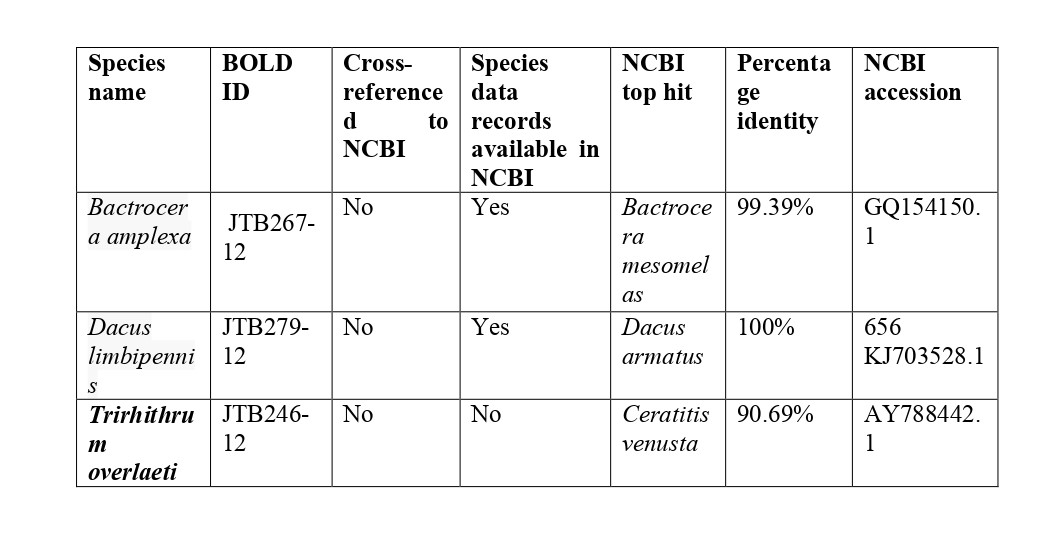

In [235]:
from IPython.display import Image, display
display(Image("insects_discrepancies.jpg"))

# Loading barcode data to database
We used psl COPY command to load csv barcode data to the database



In [296]:
df_coi_to_db=pd.read_csv('coi_final_sep_with_database_columns.csv')

## Filter COI barcodes from the original sequences 

In [297]:
coi_barcodes_with_low_quality_from_bold=coi_with_low_quality_from_bold["processid"].to_list()
print(f"Barcodes flagged to be of poor quality from BOLD:{coi_barcodes_with_low_quality_from_bold}")
coi_barcodes_less_than400=df_coi_below400["processid"].to_list()
print("Barcodes less than 400 base pairs")
print(coi_barcodes_less_than400)
## We will fikter out sequneces that matched different genus i.e the ones bolded out in the list of questionable sequnces
coi_questionable_barcode_after_blast=["JTB246-12"]
all_fillterable_coi=coi_barcodes_with_low_quality_from_bold+coi_barcodes_less_than400+coi_questionable_barcode_after_blast
print("Total filtered COI sequnces" )
print(len(all_fillterable_coi))
all_fillterable_coi

Barcodes flagged to be of poor quality from BOLD:['ANICN869-10']
Barcodes less than 400 base pairs
['AFRM012-12', 'HCBK103-05', 'HCBK108-05', 'HCBK137-05', 'BACTR017-17', 'AFRFF055-16', 'PMANL3235-14', 'PMANL3442-14']
Total filtered COI sequnces
10


['ANICN869-10',
 'AFRM012-12',
 'HCBK103-05',
 'HCBK108-05',
 'HCBK137-05',
 'BACTR017-17',
 'AFRFF055-16',
 'PMANL3235-14',
 'PMANL3442-14',
 'JTB246-12']

## Filtering COI

In [298]:
## Filtering
df_coi_to_db_filtered = df_coi_to_db[~df_coi_to_db["bold_id"].isin(all_fillterable_coi)]
df_coi_to_db_filtered

,matk_id,insect_id,nucleotide,country,genbank_accession,bold_id
0,1,21,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,Kenya,KF643041,AFMIC184-12
2,3,21,----------------------------------------------...,Kenya,KF643042,AFRM023-12
3,4,21,AACCTTATATTTTATTTTTGGAATTTGAGCTGGAATAGTAGGAACC...,Kenya,KF643038,AFRM028-12
4,5,21,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTGGATAGTAGGAACC...,Kenya,GQ330222,HCBK009-03
5,6,21,NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...,Kenya,GQ330271,HCBK016-03
...,...,...,...,...,...,...
686,711,593,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643201,PMANK904-08
687,712,593,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643206,PMANK913-08
688,713,593,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643208,PMANK916-08
689,714,593,AACTTTATATTTTATTTTTGGAATTTGATCAGGAATAGTGGGAACA...,Kenya,KF643205,PMANL2551-12


## save to csv file for data upload to the databse 

In [ ]:
df_coi_to_db_filtered.to_csv("final_filtered_coi.csv")

## Loading data to the database

In [ ]:
The filtered COI and matK sequnces were load